# 0. Importing Required Libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("../Functions")
import warnings
warnings.filterwarnings(action = 'once')
import custom_functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatch
from matplotlib_venn import venn2
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import KMeans

plt.style.use('ggplot')
## Change title size of a plot
mpl.rcParams['axes.titlesize'] = 22
# Figure size
mpl.rc("figure", figsize = (15,7))
## Change label size(x and y) of a plot
mpl.rcParams['axes.labelsize'] = 18
## Change xticks size of a plot
mpl.rcParams['xtick.labelsize'] = 16
## Change yticks size of a plot
mpl.rcParams['ytick.labelsize'] = 16

# 1. Getting Data

In [2]:
# Reading the excel file, sheet = Coles Transactions 
data = pd.read_excel("Simulated Coles Data.xlsx", sheet_name = "Coles Transactions")

D:\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


# 2. Data Exploration

In [3]:
# Shape of the dataframe
data.shape

(58100, 53)

Data has 58,100 observations and 53 variables.

In [4]:
# Name of the columns
data.columns

Index(['ReceiptID', 'Value', 'pmethod', 'sex', 'homeown', 'income', 'age',
       'PostCode', 'nchildren', 'fruit', 'freshmeat', 'dairy',
       'MozerallaCheese', 'cannedveg', 'cereal', 'frozenmeal', 'frozendessert',
       'PizzaBase', 'TomatoSauce', 'frozen fish', 'bread', 'milk', 'softdrink',
       'fruitjuice', 'confectionery', 'fish', 'vegetables', 'icecream',
       'energydrink', 'tea', 'coffee', 'laundryPowder', 'householCleaners',
       'corn chips', 'Frozen yogurt', 'Chocolate', 'Olive Oil', 'Baby Food',
       'Napies', 'banana', 'cat food', 'dog food', 'mince', 'sunflower Oil',
       'chicken', 'vitamins', 'deodorants', 'dishwashingliquid', 'onions',
       'lettuce', 'KitKat', 'TeaTowel', 'Scones'],
      dtype='object')

In [5]:
# Getting first 5 rows of the data
data.head()

,ReceiptID,Value,pmethod,sex,homeown,income,age,PostCode,nchildren,fruit,...,sunflower Oil,chicken,vitamins,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones
0,600001,78.0,2,2,2,83167.0,72.0,2437,0.0,0,...,0,1,1,0,1,1,1,0,0,0
1,600002,120.0,3,2,1,15151.0,78.0,2187,3.0,0,...,1,0,0,1,0,0,1,0,0,0
2,600003,198.0,3,1,1,21367.0,42.0,2378,0.0,1,...,1,1,0,0,0,1,1,0,0,0
3,600004,190.0,2,1,1,56528.0,59.0,2453,3.0,0,...,1,1,0,0,1,0,1,0,0,0
4,600005,173.0,3,1,1,43373.0,39.0,2146,2.0,0,...,0,1,0,0,1,0,0,0,0,0


In [6]:
# Getting summary of all the columns
data.describe()

,ReceiptID,Value,pmethod,sex,homeown,income,age,nchildren,freshmeat,dairy,...,sunflower Oil,chicken,vitamins,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones
count,58100.000000,58100.000000,58100.000000,58100.000000,58100.000000,58099.000000,58099.000000,58098.000000,58100.000000,58100.000000,...,58100.000000,58100.000000,58100.000000,58100.000000,58100.000000,58100.000000,58100.00000,58100.000000,58100.000000,58100.000000
mean,629050.500017,77.286134,2.496162,1.598055,1.389501,74838.192084,39.716626,1.348549,0.186145,0.231050,...,0.271394,0.650929,0.201824,0.251601,0.351411,0.221893,0.74315,0.016403,0.037108,0.046024
std,16772.169250,57.538666,2.520534,0.490295,2.489640,23952.338326,11.612701,2.758248,0.389227,0.421508,...,0.444683,0.476680,0.401365,0.433937,0.477415,0.415523,0.43690,0.127020,0.189029,0.209539
min,600001.000000,0.929691,1.000000,1.000000,1.000000,6000.230000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,614525.750000,29.530734,2.000000,1.000000,1.000000,65582.790269,33.751207,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,629050.500000,63.581908,2.000000,2.000000,1.000000,70168.878667,37.779257,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,643575.250000,116.000000,3.000000,2.000000,2.000000,75371.207579,42.217415,2.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000
max,658100.000000,1967.696760,101.000000,2.000000,102.000000,650235.250000,95.000000,105.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [7]:
# Information about the dataframe
# null_counts = true, will not count rows which have missing values in it.
data.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58100 entries, 0 to 58099
Data columns (total 53 columns):
ReceiptID            58100 non-null int64
Value                58100 non-null float64
pmethod              58100 non-null int64
sex                  58100 non-null int64
homeown              58100 non-null int64
income               58099 non-null float64
age                  58099 non-null float64
PostCode             48308 non-null object
nchildren            58098 non-null float64
fruit                58100 non-null object
freshmeat            58100 non-null int64
dairy                58100 non-null int64
MozerallaCheese      58100 non-null int64
cannedveg            58099 non-null float64
cereal               58091 non-null float64
frozenmeal           58100 non-null int64
frozendessert        58100 non-null int64
PizzaBase            58099 non-null float64
TomatoSauce          58100 non-null int64
frozen fish          58100 non-null int64
bread                58100 non-null

The columns having count less than 58,100 means those columns have missing values in them. Most of the columns are of type integer and float.

In [8]:
# Getting number of missing values in each column
data.isna().sum()

ReceiptID               0
Value                   0
pmethod                 0
sex                     0
homeown                 0
income                  1
age                     1
PostCode             9792
nchildren               2
fruit                   0
freshmeat               0
dairy                   0
MozerallaCheese         0
cannedveg               1
cereal                  9
frozenmeal              0
frozendessert           0
PizzaBase               1
TomatoSauce             0
frozen fish             0
bread                   0
milk                    1
softdrink               0
fruitjuice              0
confectionery           1
fish                    0
vegetables              0
icecream                0
energydrink             0
tea                     0
coffee                  0
laundryPowder           0
householCleaners        0
corn chips              0
Frozen yogurt           0
Chocolate               0
Olive Oil               0
Baby Food               0
Napies      

Most of the missing values are in column PostCode which is 9792 and second highest number of missing values is in cereal column which is 9. 

In [9]:
print("Total number of missing values is :", data.isna().sum().sum())

Total number of missing values is : 9809


D:\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


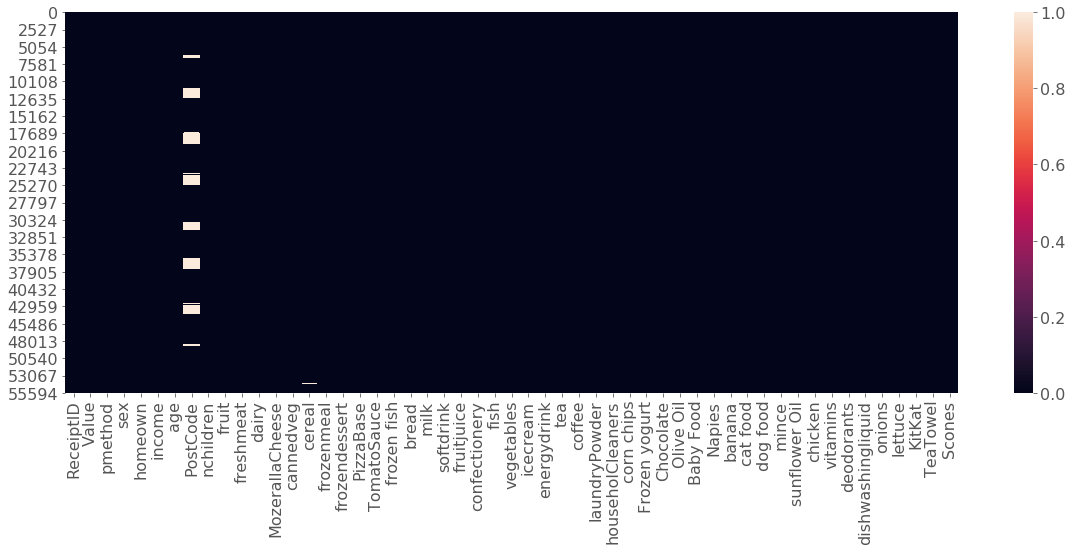

In [10]:
# Plotting the missing values
plt.figure(figsize = (20,7))
sns.heatmap(data.isna())
plt.show()

On the y-axis the numbers represent the row number of the observation and x-axis represents the column. Colorbar on the right represents the intensity of the missing value. This graph above confirms the statement we just made before about the missing values distribution.

# 3. Data Preprocessing and Cleaning

In [11]:
data.describe()

,ReceiptID,Value,pmethod,sex,homeown,income,age,nchildren,freshmeat,dairy,...,sunflower Oil,chicken,vitamins,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones
count,58100.000000,58100.000000,58100.000000,58100.000000,58100.000000,58099.000000,58099.000000,58098.000000,58100.000000,58100.000000,...,58100.000000,58100.000000,58100.000000,58100.000000,58100.000000,58100.000000,58100.00000,58100.000000,58100.000000,58100.000000
mean,629050.500017,77.286134,2.496162,1.598055,1.389501,74838.192084,39.716626,1.348549,0.186145,0.231050,...,0.271394,0.650929,0.201824,0.251601,0.351411,0.221893,0.74315,0.016403,0.037108,0.046024
std,16772.169250,57.538666,2.520534,0.490295,2.489640,23952.338326,11.612701,2.758248,0.389227,0.421508,...,0.444683,0.476680,0.401365,0.433937,0.477415,0.415523,0.43690,0.127020,0.189029,0.209539
min,600001.000000,0.929691,1.000000,1.000000,1.000000,6000.230000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,614525.750000,29.530734,2.000000,1.000000,1.000000,65582.790269,33.751207,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,629050.500000,63.581908,2.000000,2.000000,1.000000,70168.878667,37.779257,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,643575.250000,116.000000,3.000000,2.000000,2.000000,75371.207579,42.217415,2.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000
max,658100.000000,1967.696760,101.000000,2.000000,102.000000,650235.250000,95.000000,105.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Receipt ID
#### Shows receipt id of the transaction. Each transaction should have unique receipt id.

In [12]:
# Checking if there are missing values or not
data["ReceiptID"].isna().sum()

0

In [13]:
len(data["ReceiptID"])

58100

In [14]:
# Getting length of unique ReceiptID
len(set(data["ReceiptID"]))

58091

9 duplicate entries in Receipt ID.

In [15]:
data[data.duplicated("ReceiptID", keep = False)].sort_values("ReceiptID")

,ReceiptID,Value,pmethod,sex,homeown,income,age,PostCode,nchildren,fruit,...,sunflower Oil,chicken,vitamins,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones
79,600090,142.000000,3,2,1,50226.000000,81.000000,2250,2.0,1,...,0,1,0,0,0,0,1,0,0,0
89,600090,96.000000,2,2,1,95560.000000,12.000000,2422,3.0,1,...,1,1,1,0,0,1,1,0,0,0
82,600093,45.000000,2,2,1,17984.000000,30.000000,2445,1.0,1,...,0,1,1,0,1,0,1,0,0,1
92,600093,152.000000,3,1,2,117353.000000,55.000000,2460,3.0,1,...,1,0,0,0,1,1,1,0,0,0
87,600099,154.000000,2,2,3,80687.000000,47.000000,2111,0.0,0,...,0,1,0,0,1,0,1,0,0,0
98,600099,17.000000,2,2,1,64145.000000,42.000000,2285,0.0,0,...,1,1,0,0,1,0,1,0,1,0
12294,612295,16.000000,4,1,2,67443.834744,38.810297,NaN,3.0,1,...,1,1,0,1,1,0,1,0,0,1
12296,612295,28.740141,2,2,1,79696.212416,39.079175,NaN,2.0,0,...,0,1,0,0,0,0,1,0,1,0
12306,612305,14.506269,4,2,1,72757.193087,31.349241,NaN,3.0,0,...,0,0,1,0,0,1,0,0,0,0
12304,612305,22.287095,2,2,1,72118.969656,28.102349,NaN,1.0,1,...,0,1,0,0,1,0,1,0,0,0


Here only ReceiptID has duplicate values not other columns that means transactions are different. We won't be needing ReceiptID for our analysis, so we are not dealing with this issue.

### Value
#### Shows the value of the transaction in dollars.

In [16]:
# Summary of the value column
data["Value"].describe()

count    58100.000000
mean        77.286134
std         57.538666
min          0.929691
25%         29.530734
50%         63.581908
75%        116.000000
max       1967.696760
Name: Value, dtype: float64

In [17]:
# Checking if there are missing values or not
data["Value"].isna().sum()

0

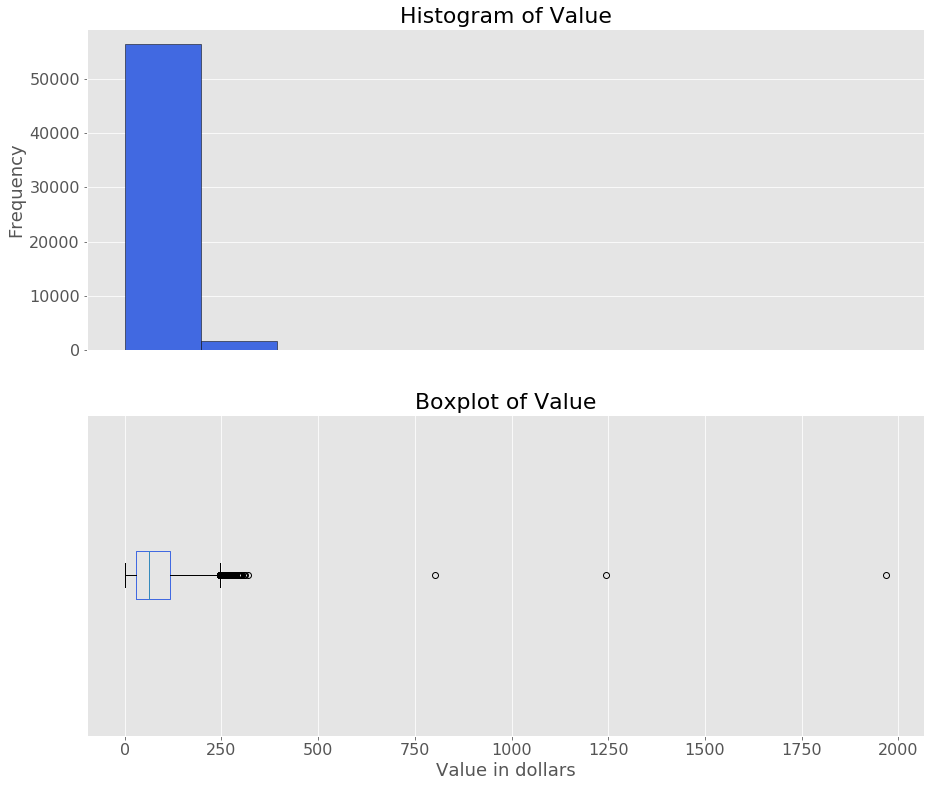

In [18]:
# Visualization before data cleaning
%autoreload 2
custom_functions.create_histogram_plus_boxplot(data["Value"], "Value", color = "royalblue", ylabel = "Frequency", 
                                               xlabel = "Value in dollars" , size = (15,13))

Histogram is right skewed. Most of the values are in between 0 - 250. By looking at the boxplot we can say that there are many outliers, but only 3 of them are extreme which are \\$802.0592, \\$1242.9862, \\$1967.6968. These observations could be explained by saying that they could be order for a big party or an occasion. These values might cause problems when we will be doing clustering, so I will be changing them to the median value of the column Value excluding extreme outliers. Since we are changing only 3 observation it won't be affecting results of future analysis. 

In [19]:
# Replacing extreme outliers with median value
data.loc[data["Value"] > 500, "Value"] = data.Value.median()

In [20]:
# Summary after Data cleaning
data["Value"].describe()

count    58100.000000
mean        77.220351
std         56.716522
min          0.929691
25%         29.530734
50%         63.580855
75%        116.000000
max        318.000000
Name: Value, dtype: float64

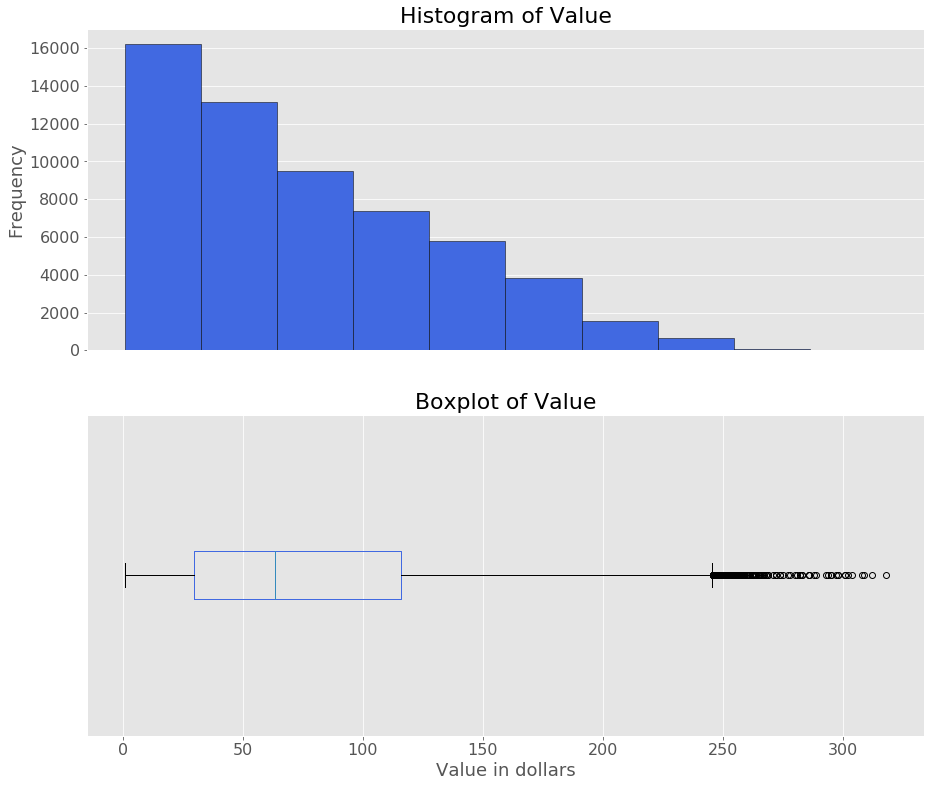

In [21]:
# Visualization after data cleaning
%autoreload 2
custom_functions.create_histogram_plus_boxplot(data["Value"], "Value", color = "royalblue", ylabel = "Frequency", 
                                               xlabel = "Value in dollars" , size = (15,13))

Distribution of Value is right skewed. It means generally the value of the transaction value is between \\$25 - \\$120. But occurence of transactions with high value is less compare to occurence of transactions with low value is quite common. There are still some outliers but they are not extreme so I am leaving them in the data as it is.

### Pmethod
#### Shows the payment method used for the transaction.
#### Payment method 1 : Cash, 2 : Card, 3 : Eftpos, 4 : Other 

In [22]:
# Summary
data["pmethod"].describe()

count    58100.000000
mean         2.496162
std          2.520534
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max        101.000000
Name: pmethod, dtype: float64

In [23]:
# Checking if there are missing values or not
data["pmethod"].isna().sum()

0

In [24]:
# Checking for invalid entries
data[data["pmethod"] > 4]

,ReceiptID,Value,pmethod,sex,homeown,income,age,PostCode,nchildren,fruit,...,sunflower Oil,chicken,vitamins,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones
58003,658004,124.0,5,2,6,90915.0,11.0,2304,9.0,0,...,0,1,1,1,1,0,1,0,0,0
58004,658005,178.0,6,2,7,105121.0,23.0,2231,10.0,1,...,0,1,0,0,0,0,1,0,0,0
58005,658006,142.0,7,1,8,102043.0,90.0,2192,11.0,1,...,1,0,0,1,0,0,1,0,0,0
58006,658007,95.0,8,2,9,111302.0,73.0,2271,12.0,0,...,1,1,1,0,0,1,1,0,0,0
58007,658008,196.0,9,1,10,25396.0,54.0,2130,13.0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58095,658096,184.0,97,2,98,90021.0,73.0,2391,101.0,0,...,0,1,0,1,0,0,1,0,0,0
58096,658097,163.0,98,2,99,69559.0,90.0,2416,102.0,0,...,0,1,0,1,1,0,1,0,0,0
58097,658098,20.0,99,2,100,119925.0,17.0,2351,103.0,0,...,1,1,1,1,1,0,1,0,0,0
58098,658099,106.0,100,2,101,54001.0,55.0,2446,104.0,1,...,1,1,0,0,1,0,0,0,0,0


In [25]:
# Find trend in the missing values with homeown and pmethod as well as nchildren
data[data["pmethod"] > 4].sort_values("pmethod", ascending = False).iloc[:30,:]

,ReceiptID,Value,pmethod,sex,homeown,income,age,PostCode,nchildren,fruit,...,sunflower Oil,chicken,vitamins,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones
58099,658100,59.0,101,2,102,72683.0,26.0,2126,105.0,0,...,0,1,0,0,0,0,1,0,0,0
58098,658099,106.0,100,2,101,54001.0,55.0,2446,104.0,1,...,1,1,0,0,1,0,0,0,0,0
58097,658098,20.0,99,2,100,119925.0,17.0,2351,103.0,0,...,1,1,1,1,1,0,1,0,0,0
58096,658097,163.0,98,2,99,69559.0,90.0,2416,102.0,0,...,0,1,0,1,1,0,1,0,0,0
58095,658096,184.0,97,2,98,90021.0,73.0,2391,101.0,0,...,0,1,0,1,0,0,1,0,0,0
58094,658095,169.0,96,2,97,60950.0,85.0,2167,100.0,0,...,0,1,0,0,1,0,1,0,0,0
58093,658094,125.0,95,2,96,39259.0,31.0,2488,99.0,0,...,1,0,0,0,0,0,1,0,0,0
58092,658093,181.0,94,1,95,70668.0,24.0,2334,98.0,1,...,0,1,0,0,0,0,0,0,0,0
58091,658092,8.0,93,1,94,41844.0,83.0,2413,97.0,0,...,0,1,0,0,1,0,1,0,0,0
58090,658091,188.0,92,1,93,60038.0,45.0,2173,96.0,0,...,1,1,0,0,1,1,1,0,0,0


There are 97 entries which are greater than 4(i.e invalid). We can also see that observations which have invalid values for pmethod also have invalid values for homeown(> 3)\[homeown 1 : Yes, 2 : No, 3 : Unknown\] and nchildren. The values are increasing at same rate(increamented one by each row). We will remove these observation as the invalid values persist in more than one column.

In [26]:
# Filtering out the data
data = data[data["pmethod"] < 5]

In [27]:
# Converting the numeric field to categorical
data["pmethod"] = data["pmethod"].astype("category")

In [28]:
# Creating a new variable replacing categorical codes to actual category names
data["pmethod_processed"] = data["pmethod"].values.map({1 : "Cash", 2 : "Card", 3 : "EFTPOS", 4 : "Other"})

In [29]:
# Gettting the frequency of the categories
pmethod_count_series = data["pmethod_processed"].value_counts()
pmethod_count_series

Card      24720
EFTPOS    17690
Cash       8332
Other      7261
Name: pmethod_processed, dtype: int64

There are 4 unique values for pmethod. Most common of them is card with frequency of 24720.

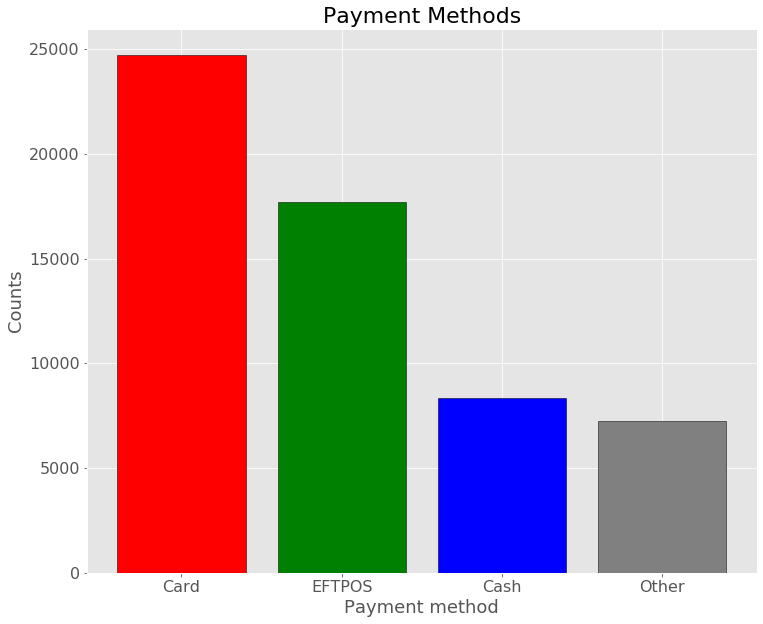

In [30]:
# Visualization after data cleaning
%autoreload 2
custom_functions.barplot(pmethod_count_series, "Payment method", "Counts", "Payment Methods", 
                         color=["red","green", "blue", "grey"], labels = ["Card", "EFTPOS", "Cash", "Other"])

Most common form of payment is via card and EFTPOS.

### Sex
#### Shows gender of the customer 1 : Male, 2 : Female

In [31]:
# Summary
data["sex"].describe()

count    58003.000000
mean         1.597831
std          0.490340
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [32]:
# Checking if there are missing values or not
data["sex"].isna().sum()

0

No invalid entries

In [33]:
# Converting sex into categorical variable
data["sex"] = data["sex"].astype("category")

In [34]:
# Creating a new variable replacing categorical codes to actual category names
data["sex_processed"] = data["sex"].map({1 : "Male", 2 : "Female"})

# Gettting the frequency of the categories
sex_counts_series = data["sex_processed"].value_counts()
sex_counts_series

Female    34676
Male      23327
Name: sex_processed, dtype: int64

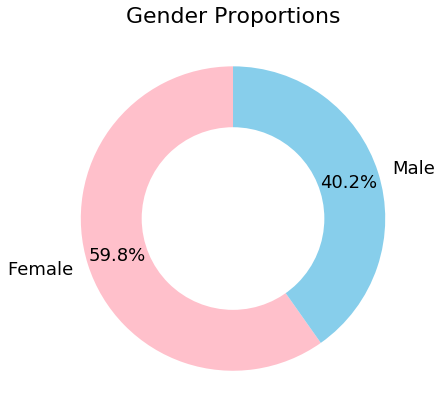

In [35]:
# Donut Chart
plt.pie(sex_counts_series, colors = ["pink", "skyblue"], labels = ["Female", "Male"], 
        autopct = '%1.1f%%', startangle = 90, pctdistance = 0.80, textprops = {"fontsize" : 18})
plt.gca().add_artist(plt.Circle((0, 0), 0.60, fc = 'white'));
plt.title("Gender Proportions")
plt.show()

### Homeown
#### Shows whether customer own a home or not 1 : Yes, 2: No, 3 : Unknown

In [36]:
# Summary
data["homeown"].describe()

count    58003.000000
mean         1.301519
std          0.510835
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: homeown, dtype: float64

In [37]:
# Checking if there are missing values or not
data["homeown"].isna().sum()

0

In [38]:
# Filtering the data
data[data["homeown"] > 3]

,ReceiptID,Value,pmethod,sex,homeown,income,age,PostCode,nchildren,fruit,...,vitamins,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones,pmethod_processed,sex_processed
58001,658002,48.0,3,2,4,60985.0,46.0,2143,7.0,0,...,0,1,1,0,0,0,0,0,EFTPOS,Female
58002,658003,68.0,4,1,5,101239.0,73.0,2193,8.0,0,...,0,1,1,0,1,0,0,0,Other,Male


For above two observations the value of homeown column is invalid. Also the values for nchildren is quite unusual so I will be removing these two observations.

In [39]:
# Filtering out the data
data = data[data["homeown"] < 4]

# Converting the homeown from integer to categorical variable
data["homeown"] = data["homeown"].astype("category")

In [40]:
# Creating a new variable replacing categorical codes to actual category names
data["homeown_processed"] = data["homeown"].map({1 : "Yes", 2 : "No", 3: "Unknown"})

# Gettting the frequency of the categories
homeown_count_series = data["homeown_processed"].value_counts()
homeown_count_series

Yes        41970
No         14580
Unknown     1451
Name: homeown_processed, dtype: int64

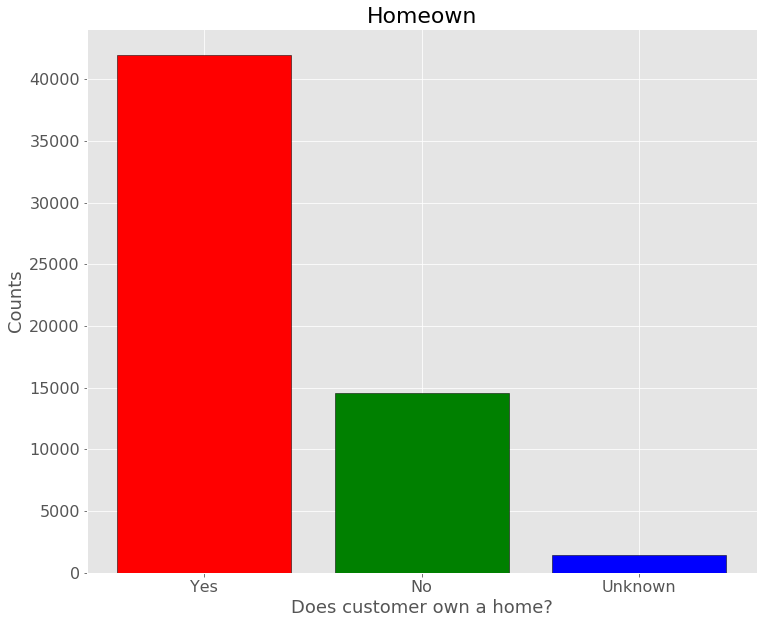

In [41]:
%autoreload 2
custom_functions.barplot(homeown_count_series, "Does customer own a home?", "Counts", "Homeown", 
                         color=["red", "green", "blue"], labels = ["Yes", "No", "Unknown"])

Around 42,000 of the customers own a house where around 15,000 of the customers are maybe renting the place they are staying.

### Income
#### Shows income of the customers

In [42]:
# Summary
data["income"].describe()

count     58000.000000
mean      74849.692464
std       23938.874467
min        6000.230000
25%       65589.469477
50%       70169.026563
75%       75363.116654
max      650235.250000
Name: income, dtype: float64

In [43]:
# Checking if there are missing values or not
data["income"].isna().sum()

1

In [44]:
# Checking for missing values
data[data["income"].isna()]

,ReceiptID,Value,pmethod,sex,homeown,income,age,PostCode,nchildren,fruit,...,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones,pmethod_processed,sex_processed,homeown_processed
56951,656952,182.0,1,1,1,NaN,16.0,2307,3.0,1,...,0,0,1,1,0,0,0,Cash,Male,Yes


In [45]:
# Replacing missing value with mean value
data.loc[data["income"].isna(), "income"]  = data["income"].median()

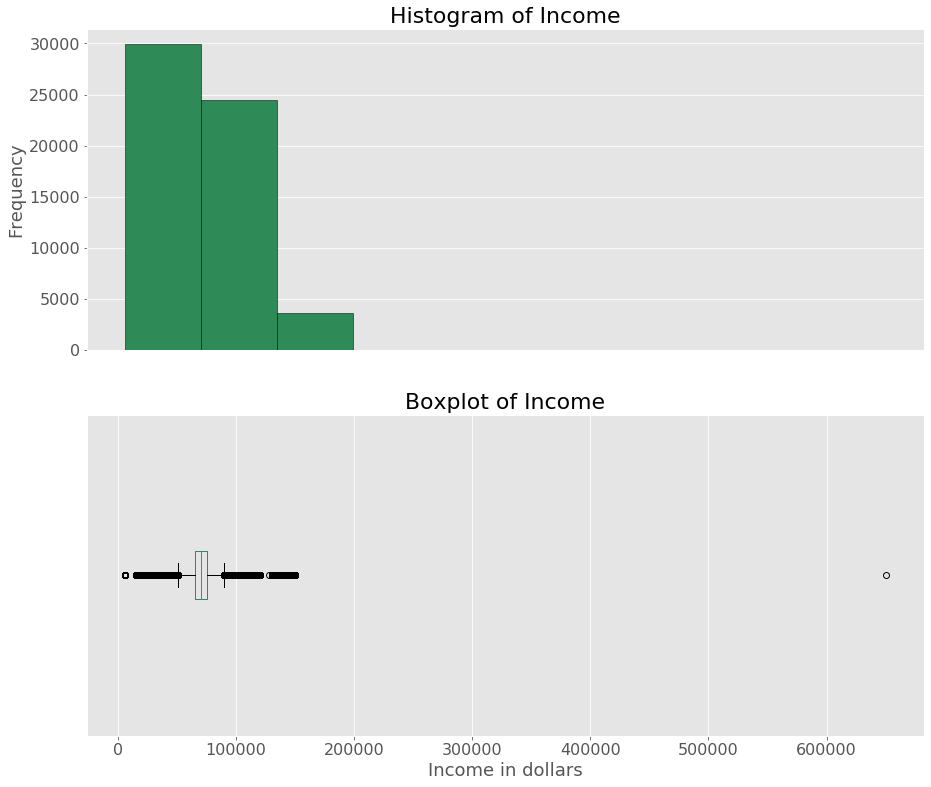

In [46]:
%autoreload 2
custom_functions.create_histogram_plus_boxplot(data["income"], "Income", color = "seagreen", ylabel = "Frequency", 
                                               xlabel = "Income in dollars" , size = (15,13))

Distribution of income is right skewed(as expected). Number of people with high salaries are low compare to number of people with low salaries. We can see there are many outliers. But there is one extreme outlier where income is around \\$650235.25. We will replace this value with mean as well because it will affect the clustering results.

In [47]:
# Replacing the extreme outlier with the median value
data.loc[data["income"] == data["income"].max(), "income"] = data["income"].median()

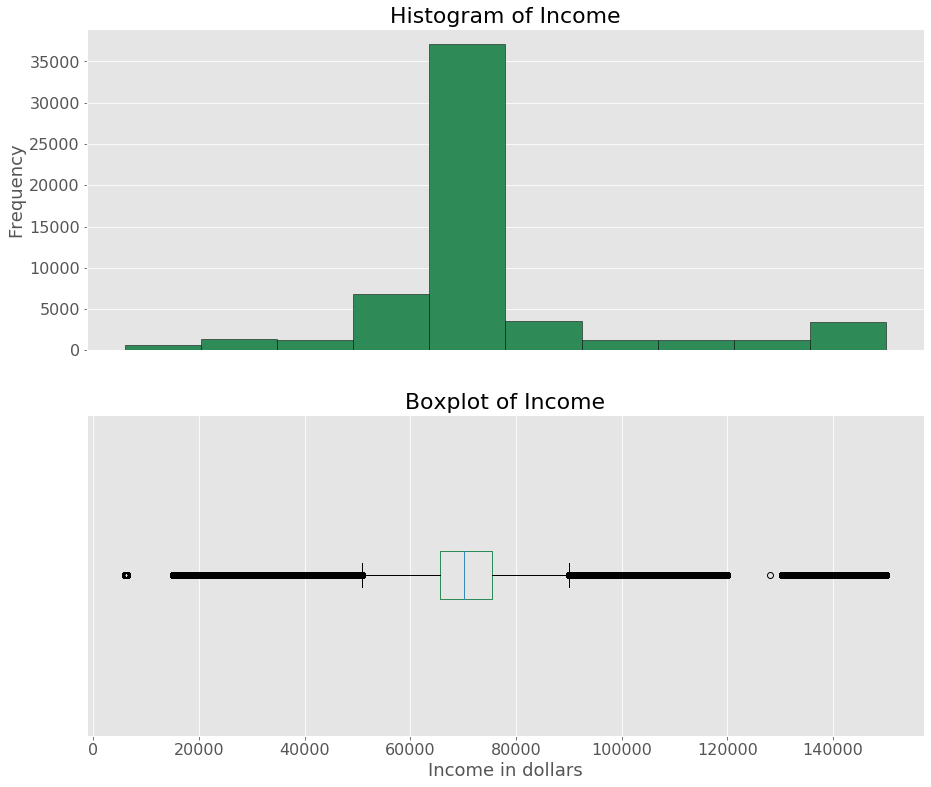

In [48]:
%autoreload 2
custom_functions.create_histogram_plus_boxplot(data["income"], "Income", color = "seagreen", ylabel = "Frequency", 
                                               xlabel = "Income in dollars" , size = (15,13))

The distribution somewhat looks normal to me. People with extreme salaries(either low or high) are less compare to median salary which is around \\$70k.  There are still outliers in the data but since distribution somewhat looks like normal(usually found in real life) I won't be dealing with them. 

### Age
#### It is the age of the customer.

In [49]:
# summary
data["age"].describe()

count    58000.000000
mean        39.694970
std         11.566954
min         10.000000
25%         33.751674
50%         37.775554
75%         42.204893
max         95.000000
Name: age, dtype: float64

In [50]:
# Checking if there are missing values or not
data["age"].isna().sum()

1

In [51]:
# Checking the missing value observation
data[data["age"].isna()]

,ReceiptID,Value,pmethod,sex,homeown,income,age,PostCode,nchildren,fruit,...,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones,pmethod_processed,sex_processed,homeown_processed
38394,638395,21.807319,2,2,1,66998.679198,NaN,2250,6.0,0,...,0,1,0,1,0,0,0,Card,Female,Yes


In [52]:
# Replacing the missing value with the median
data.loc[data.age.isna(), "age"] = data["age"].median()

# Checking if there are missing values or not
data["age"].isna().sum()

0

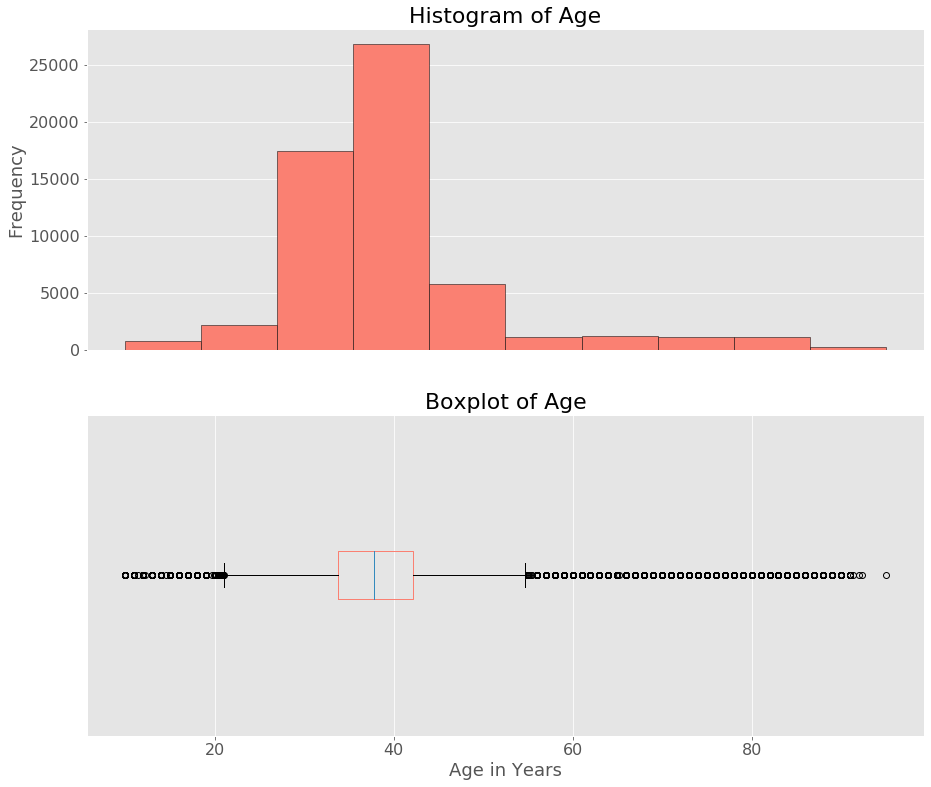

In [53]:
%autoreload 2
custom_functions.create_histogram_plus_boxplot(data["age"], "Age", color = "salmon", ylabel = "Frequency", 
                                               xlabel = "Age in Years" , size = (15,13))

Distribution is almost normal(slightly right skewed). The age is from 10 to 95 years. There are many outliers but none of them are extreme. Here I would like to like to explore young customers with age less than 16.

In [54]:
# Filtering the data
young_customers = data[(data["age"] < 16)]
young_customers

,ReceiptID,Value,pmethod,sex,homeown,income,age,PostCode,nchildren,fruit,...,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones,pmethod_processed,sex_processed,homeown_processed
39,600040,126.0,2,1,1,114736.0,11.0,2500,0.0,0,...,0,1,0,1,0,0,0,Card,Male,Yes
40,600041,125.0,3,2,1,99181.0,14.0,2166,0.0,1,...,0,0,0,0,0,0,0,EFTPOS,Female,Yes
62,600063,135.0,2,2,1,27685.0,14.0,2189,1.0,0,...,1,0,0,1,0,0,0,Card,Female,Yes
66,600067,152.0,3,1,1,24287.0,10.0,2313,3.0,0,...,0,1,0,1,0,0,0,EFTPOS,Male,Yes
83,600084,179.0,2,1,1,72758.0,14.0,2261,3.0,0,...,1,0,0,1,0,0,0,Card,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57960,657961,143.0,2,2,2,95723.0,14.0,2341,2.0,1,...,1,0,1,0,0,0,0,Card,Female,No
57972,657973,89.0,3,2,1,57158.0,13.0,2287,1.0,1,...,0,0,0,1,0,0,0,EFTPOS,Female,Yes
57975,657976,74.0,3,2,2,110465.0,13.0,2390,0.0,0,...,0,0,0,1,0,0,0,EFTPOS,Female,No
57987,657988,141.0,2,2,1,70560.0,12.0,2466,2.0,0,...,0,1,1,0,0,0,0,Card,Female,Yes


In [55]:
young_customers["income"].describe()

count       379.000000
mean      68084.010087
std       30718.122639
min       15578.000000
25%       40242.500000
50%       68046.000000
75%       93854.000000
max      141842.000000
Name: income, dtype: float64

In [56]:
young_customers["homeown"].value_counts()

2    189
1    183
3      7
Name: homeown, dtype: int64

As we can see that most of the younge customers have high income and they own a house, which raises a question regarding the quality of the data. As well as for some observations value of age is in decimal points and not in whole number(We don't know the way data was collected so we can't rule out the age with decimal points as invalid). I will be removing the records where age of the custmer is < 16, because they have high income as this doesn't make any sense.

In [57]:
data = data.loc[data["age"] >= 16, :]

In [58]:
# Summary of age after cleaning
data["age"].describe()

count    57622.000000
mean        39.870116
std         11.399713
min         16.000000
25%         33.844418
50%         37.826017
75%         42.242697
max         95.000000
Name: age, dtype: float64

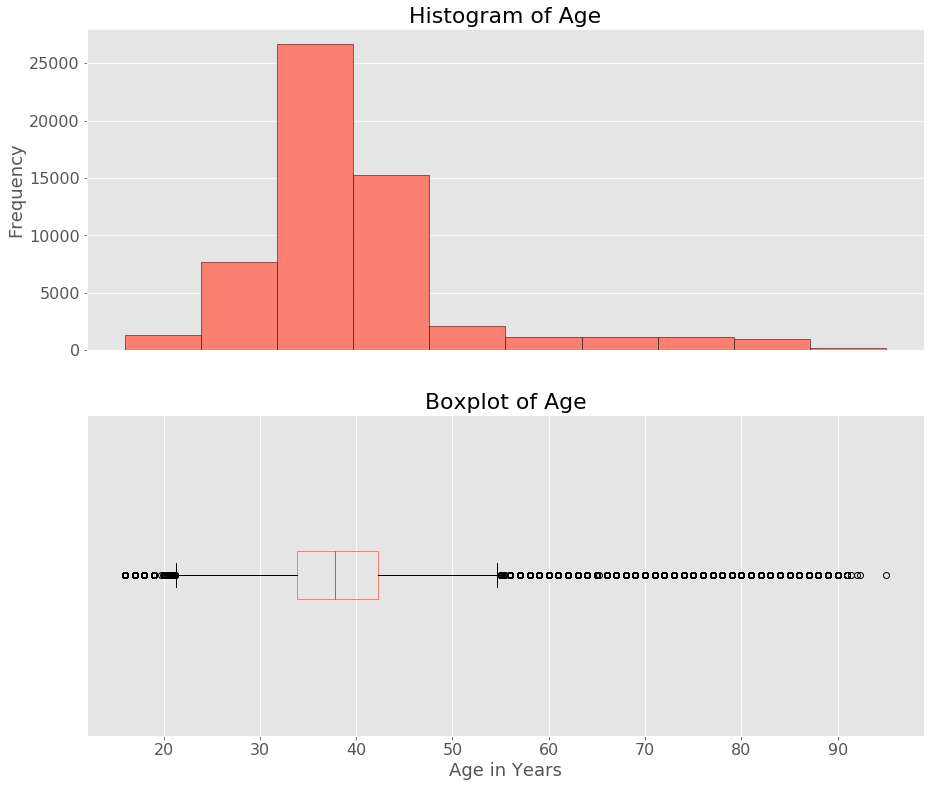

In [59]:
%autoreload 2
custom_functions.create_histogram_plus_boxplot(data["age"], "Age", color = "salmon", ylabel = "Frequency", 
                                               xlabel = "Age in Years" , size = (15,13))

Distribution is almost normal(slightly right skewed). The age is from 16 to 95 years. There are many outliers but none of them are extreme.

### Postcode
#### Postcode of the customers' residence

In [60]:
# Summary
data["PostCode"].describe()

count     47834
unique     1250
top        2122
freq        809
Name: PostCode, dtype: int64

In [61]:
# Missing values
data["PostCode"].isna().sum()

9788

Around 9788(~17%) of the values are missing, As this is significant amount of observations we can't just remove them. We will keep them as it is as this field is not useful for our analysis.

### nchildren
#### Shows number of children customer has

In [62]:
# summary
data["nchildren"].describe()

count    57620.000000
mean         1.256716
std          1.057951
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         11.000000
Name: nchildren, dtype: float64

In [63]:
# Missing values
data["nchildren"].isna().sum()

2

In [64]:
data[data["nchildren"].isna()]

,ReceiptID,Value,pmethod,sex,homeown,income,age,PostCode,nchildren,fruit,...,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones,pmethod_processed,sex_processed,homeown_processed
55938,655939,174.0,3,2,2,15560.0,58.0,2111,NaN,0,...,0,0,0,1,0,0,0,EFTPOS,Female,No
57524,657525,191.0,2,2,2,88791.0,30.0,2107,NaN,0,...,0,0,0,1,0,0,0,Card,Female,No


There are two missing values for number of children. As values for other variables look good, I am going to replace the missing values with median value of nchildren. 

In [65]:
# Replacing missing values with median value
data.loc[data["nchildren"].isna(), "nchildren"] = data["nchildren"].median()

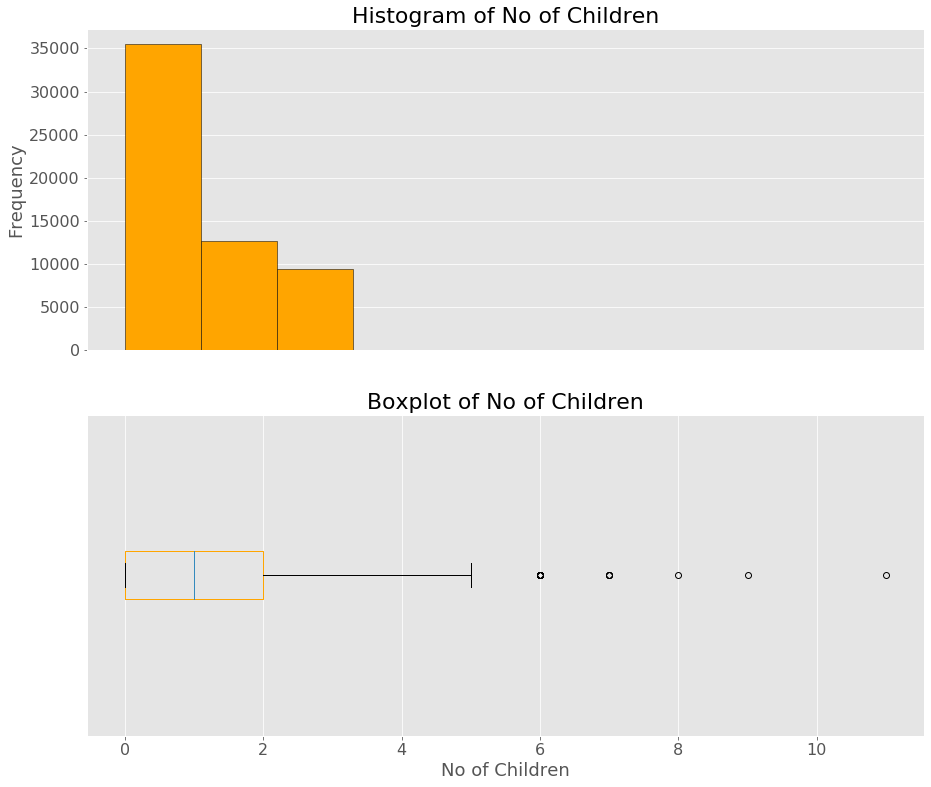

In [66]:
%autoreload 2
custom_functions.create_histogram_plus_boxplot(data["nchildren"], "No of Children", color = "orange", ylabel = "Frequency", 
                                               xlabel = "No of Children" , size = (15,13))

There are few outliers(nchildren > 5). The field is not useful for the analysis so I am going to leave the outliers as it is. Because as you can see that the occurence of the outliers in the data is rare. nchilren is supposed to be district not continuous, So histogram is not the good choice.

In [67]:
# Converting floating nchildren to category
data["nchildren_processed"] = data["nchildren"].astype("int").astype("category")

In [68]:
# Summary
nchildren_counts = data["nchildren_processed"].value_counts()
nchildren_counts

1     18519
0     16939
2     12712
3      9403
4        16
5        14
6        12
7         4
11        1
9         1
8         1
Name: nchildren_processed, dtype: int64

In [69]:
nchildren_counts.sort_values(inplace = True, ascending = False)

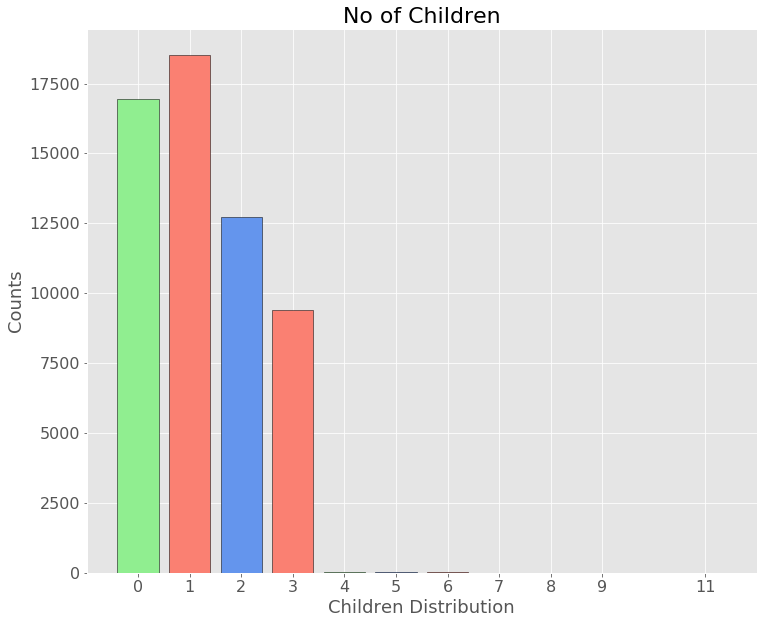

In [70]:
%autoreload 2
custom_functions.barplot(nchildren_counts, "Children Distribution", "Counts", "No of Children", 
                         color = ("salmon", "lightgreen", "cornflowerblue",) * 4, labels = nchildren_counts.index)

Around 32% the customers have one child, followed by 29% of them having no child. % of customers having 4 or more children is 0.08, which is rare.

In [71]:
# Creating a new variable parent from the nchildren
data["parent"] = ["Yes" if n > 0 else "No" for n in data["nchildren"] ]

# Changing the type of the parent to category
data["parent"] = data["parent"].astype("category")

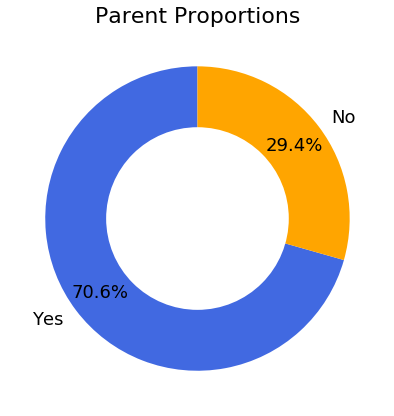

In [72]:
# Donut Chart
plt.pie(data["parent"].value_counts(), colors = ["royalblue", "orange"], labels = ["Yes", "No"], 
        autopct = '%1.1f%%', startangle = 90, pctdistance = 0.80, textprops = {"fontsize" : 18})
plt.gca().add_artist(plt.Circle((0, 0), 0.60, fc = 'white'));
plt.title("Parent Proportions")
plt.show()

Almost 71% of the customers are parents.

### Basket items
#### Items that customers bought
#### 0 : not purchased 1: purchased

#### 1. Fruit 

In [73]:
# Summary
data["fruit"].describe()

count     57622
unique        8
top           1
freq      36491
Name: fruit, dtype: int64

In [74]:
# Frequency of values
data["fruit"].value_counts()

1     36491
0     21122
11        4
o         1
7         1
6         1
4         1
3         1
Name: fruit, dtype: int64

In [75]:
# Filtering data
## o should be 0 by common sense
data.loc[data["fruit"] == "o", "fruit"] = 0

## Values greater than 1 should be 1
data.loc[data["fruit"] > 1, "fruit"] = 1

In [76]:
# Checking for missing values
data["fruit"].isna().sum()

0

In [77]:
# Summary
data["fruit"].value_counts()

1    36499
0    21123
Name: fruit, dtype: int64

#### Cannedveg

In [78]:
# Summary
data["cannedveg"].describe()

count    57621.000000
mean         0.302910
std          0.459521
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cannedveg, dtype: float64

In [79]:
# Frequency
data["cannedveg"].value_counts()

0.0    40167
1.0    17454
Name: cannedveg, dtype: int64

In [80]:
# Missing values
data["cannedveg"].isna().sum()

1

In [81]:
# Replacing missing value with 0, because missing value suggests that product was not purchased
data.loc[data["cannedveg"].isna(), "cannedveg"] = 0

#### Cereal

In [82]:
# Summary
data["cereal"].describe()

count    57613.000000
mean         0.763664
std          0.424834
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: cereal, dtype: float64

In [83]:
# Frequency
data["cereal"].value_counts()

1.0    43997
0.0    13616
Name: cereal, dtype: int64

In [84]:
# Missing values 
data["cereal"].isna().sum()

9

In [85]:
# Replacing missing value with 0, because missing value suggests that product was not purchased
data.loc[data["cereal"].isna(), "cereal"] = 0

#### Pizzabase

In [86]:
# Summary
data["PizzaBase"].describe()

count    57621.000000
mean         0.468180
std          0.498991
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: PizzaBase, dtype: float64

In [87]:
# Frequency
data["PizzaBase"].value_counts()

0.0    30644
1.0    26977
Name: PizzaBase, dtype: int64

In [88]:
# Missing values 
data["PizzaBase"].isna().sum()

1

In [89]:
# Replacing missing value with 0, because missing value suggests that product was not purchased
data.loc[data["PizzaBase"].isna(), "PizzaBase"] = 0

#### Milk

In [90]:
# Summary
data["milk"].describe()

count    57621.000000
mean         0.813436
std          0.389564
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: milk, dtype: float64

In [91]:
# Frequency
data["milk"].value_counts()

1.0    46871
0.0    10750
Name: milk, dtype: int64

In [92]:
# Missing values 
data["milk"].isna().sum()

1

In [93]:
# Replacing missing value with 0, because missing value suggests that product was not purchased
data.loc[data["milk"].isna(), "milk"] = 0

#### Fruitjuice

In [94]:
# Summary
data["fruitjuice"].describe()

count    57622.000000
mean         0.310628
std          0.463130
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: fruitjuice, dtype: float64

In [95]:
# Frequency
data["fruitjuice"].value_counts()

0    39733
1    17879
2       10
Name: fruitjuice, dtype: int64

In [96]:
# Missing values 
data["fruitjuice"].isna().sum()

0

In [97]:
# Replacing value 2 with 1, because value 2 might have been the quantity of the item
data.loc[data["fruitjuice"] == 2, "fruitjuice"] = 1

#### Confectionary

In [98]:
# Summary
data["confectionery"].describe()

count    57621.000000
mean         0.262422
std          0.439954
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: confectionery, dtype: float64

In [99]:
# Frequency
data["confectionery"].value_counts()

0.0    42500
1.0    15121
Name: confectionery, dtype: int64

In [100]:
# Missing values 
data["confectionery"].isna().sum()

1

In [101]:
# Replacing missing value with 0, because missing value suggests that product was not purchased
data.loc[data["confectionery"].isna(), "confectionery"] = 0

All other basket items don't need any kind of data cleaning. I will just change the type of all items from integer to category in the next cell.

In [102]:
basket = ['fruit', 'freshmeat', 'dairy','MozerallaCheese', 'cannedveg', 'cereal', 'frozenmeal', 'frozendessert','PizzaBase', 
          'TomatoSauce', 'frozen fish', 'bread', 'milk', 'softdrink', 'fruitjuice', 'confectionery', 'fish', 'vegetables', 
          'icecream', 'energydrink', 'tea', 'coffee', 'laundryPowder', 'householCleaners', 'corn chips', 'Frozen yogurt', 
          'Chocolate', 'Olive Oil', 'Baby Food', 'Napies', 'banana', 'cat food', 'dog food', 'mince', 'sunflower Oil', 
          'chicken', 'vitamins', 'deodorants', 'dishwashingliquid', 'onions', 'lettuce', 'KitKat', 'TeaTowel', 'Scones']


# Changing type
for item in basket:
    data[item] = data[item].astype("int").astype("category")

In [103]:
# Summary
print(data.loc[:,basket[:20]].describe())

print(data.loc[:,basket[20:40]].describe())

print(data.loc[:,basket[40:44]].describe())

        fruit  freshmeat  dairy  MozerallaCheese  cannedveg  cereal  \
count   57622      57622  57622            57622      57622   57622   
unique      2          2      2                2          2       2   
top         1          0      0                0          0       1   
freq    36499      46902  44429            40685      40168   43997   

        frozenmeal  frozendessert  PizzaBase  TomatoSauce  frozen fish  bread  \
count        57622          57622      57622        57622        57622  57622   
unique           2              2          2            2            2      2   
top              1              0          0            0            0      1   
freq         33400          51639      30645        33273        55927  47741   

         milk  softdrink  fruitjuice  confectionery   fish  vegetables  \
count   57622      57622       57622          57622  57622       57622   
unique      2          2           2              2      2           2   
top         1   

In [104]:
# Getting the count that shows how many times each item was purchased out of 58001 transactions
basket_counts = data.loc[:,basket].sum().sort_values(ascending = False)
basket_counts

bread                47741.0
milk                 46871.0
cereal               43997.0
banana               43900.0
lettuce              42819.0
chicken              37508.0
fruit                36499.0
vegetables           33710.0
frozenmeal           33400.0
laundryPowder        28512.0
Baby Food            27914.0
PizzaBase            26977.0
Frozen yogurt        26936.0
corn chips           26800.0
Chocolate            25807.0
Olive Oil            25700.0
coffee               25171.0
TomatoSauce          24349.0
householCleaners     22031.0
dishwashingliquid    20246.0
fruitjuice           17889.0
cannedveg            17454.0
MozerallaCheese      16937.0
sunflower Oil        15661.0
Napies               15304.0
confectionery        15121.0
deodorants           14499.0
mince                14445.0
dairy                13193.0
onions               12791.0
softdrink            12685.0
fish                 12316.0
vitamins             11634.0
dog food             11317.0
freshmeat     

In [105]:
# Product Frequency Percentage
basket_counts/len(data) * 100

bread                82.852036
milk                 81.342196
cereal               76.354517
banana               76.186179
lettuce              74.310159
chicken              65.093194
fruit                63.342126
vegetables           58.501961
frozenmeal           57.963972
laundryPowder        49.481101
Baby Food            48.443303
PizzaBase            46.817188
Frozen yogurt        46.746035
corn chips           46.510014
Chocolate            44.786713
Olive Oil            44.601020
coffee               43.682968
TomatoSauce          42.256430
householCleaners     38.233661
dishwashingliquid    35.135886
fruitjuice           31.045434
cannedveg            30.290514
MozerallaCheese      29.393287
sunflower Oil        27.178855
Napies               26.559300
confectionery        26.241713
deodorants           25.162264
mince                25.068550
dairy                22.895769
onions               22.198119
softdrink            22.014161
fish                 21.373781
vitamins

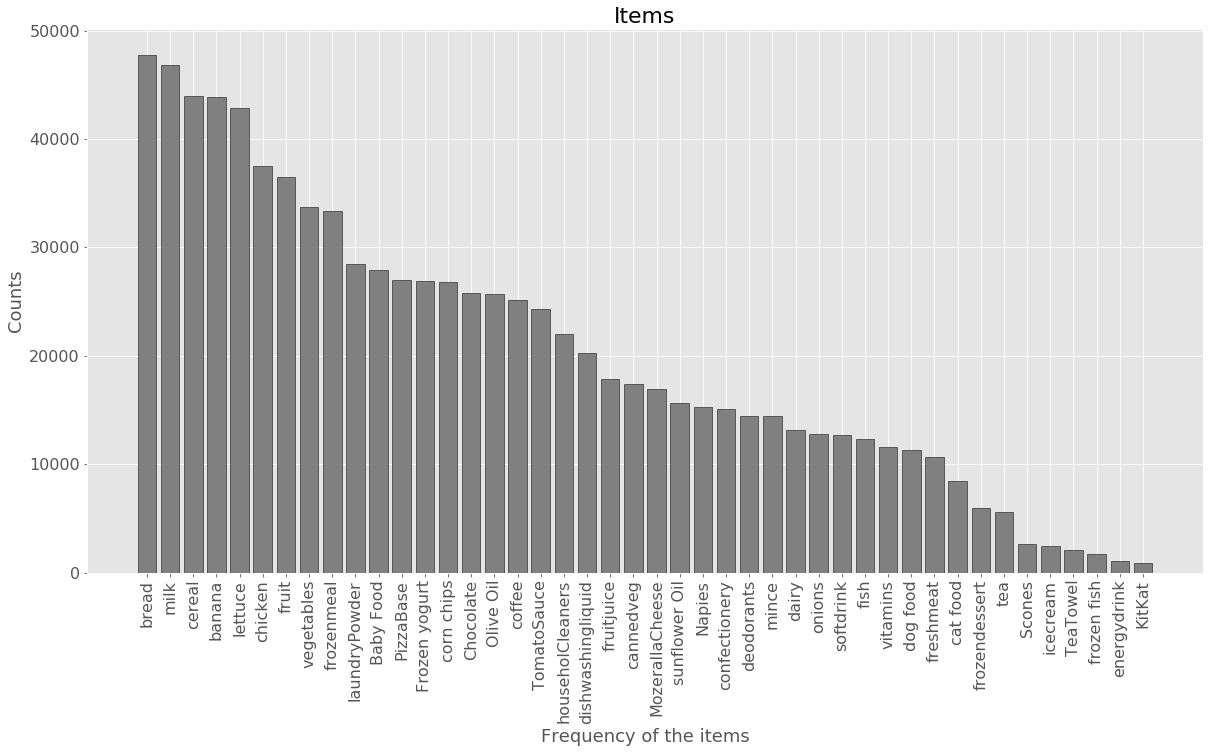

In [106]:
%autoreload 2
custom_functions.barplot(basket_counts, "Frequency of the items", "Counts", "Items", 
                         color = "grey", labels = basket_counts.index, figure_size = (20,10), xrotation = 90)

The **MOST** purchased items are :
    
    bread                82.852036%
    milk                 81.342196%
    cereal               76.354517%
    banana               76.186179%
    lettuce              74.310159%

The **LEAST** purchased items are :
    
    KitKat                1.645205%
    energydrink           1.855194%
    frozen fish           2.941585%
    TeaTowel              3.708653%
    icecream              4.361181%

### Summary and Visualization of the variables which were cleaned before variable 'AGE'

#### 1. Value

In [107]:
data["Value"].describe()

count    57622.000000
mean        76.981598
std         56.645618
min          0.929691
25%         29.426347
50%         63.287992
75%        115.540338
max        318.000000
Name: Value, dtype: float64

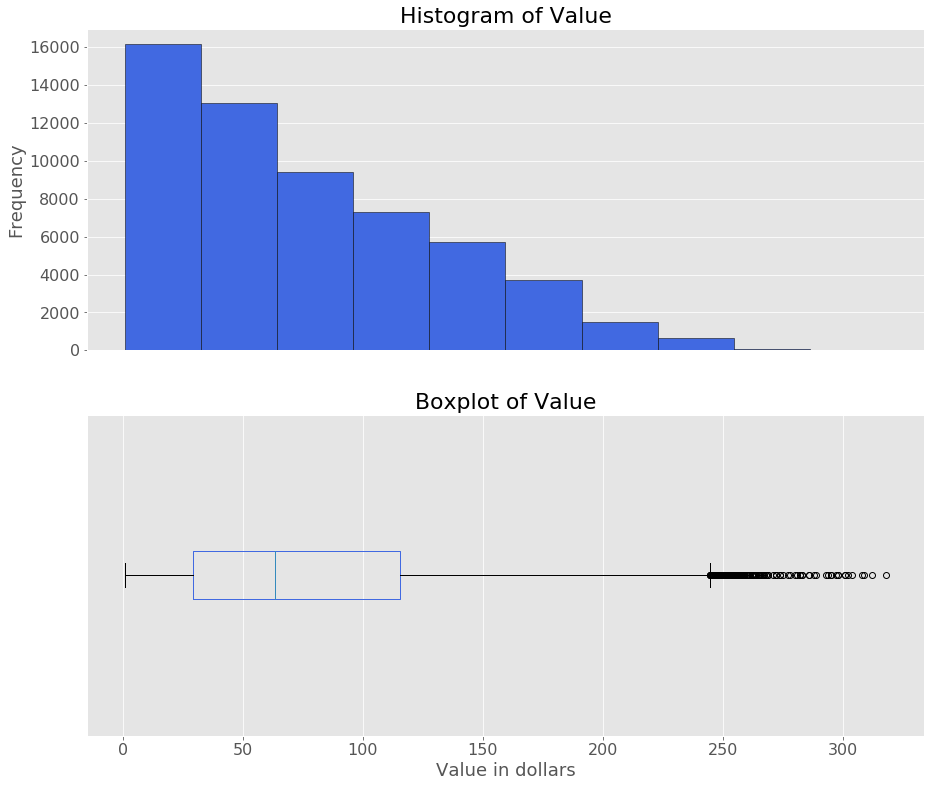

In [108]:
%autoreload 2
custom_functions.create_histogram_plus_boxplot(data["Value"], "Value", color = "royalblue", ylabel = "Frequency", 
                                               xlabel = "Value in dollars" , size = (15,13))

Distribution of Value is right skewed. It means generally the value of the transaction value is between \\$0.90* - \\$115. But occurence of transactions with high value is less compare to occurence of transactions with low value is quite common.

\[* - ALMOST\]

#### 2. Payment Method

In [109]:
data["pmethod_processed"].describe()

count     57622
unique        4
top        Card
freq      24488
Name: pmethod_processed, dtype: object

In [110]:
data["pmethod_processed"].value_counts()

Card      24488
EFTPOS    17575
Cash       8310
Other      7249
Name: pmethod_processed, dtype: int64

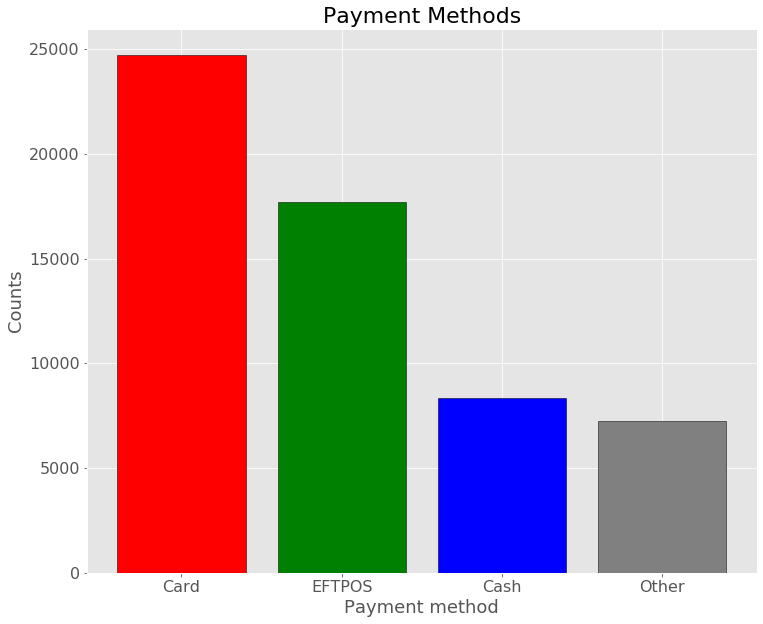

In [111]:
%autoreload 2
custom_functions.barplot(pmethod_count_series, "Payment method", "Counts", "Payment Methods", 
                         color=["red","green", "blue", "grey"], labels = ["Card", "EFTPOS", "Cash", "Other"])

Most common form of payment is via card and EFTPOS.

#### 3. Sex

In [112]:
data["sex_processed"].describe()

count      57622
unique         2
top       Female
freq       34399
Name: sex_processed, dtype: object

In [113]:
sex_counts_series = data["sex_processed"].value_counts()
sex_counts_series

Female    34399
Male      23223
Name: sex_processed, dtype: int64

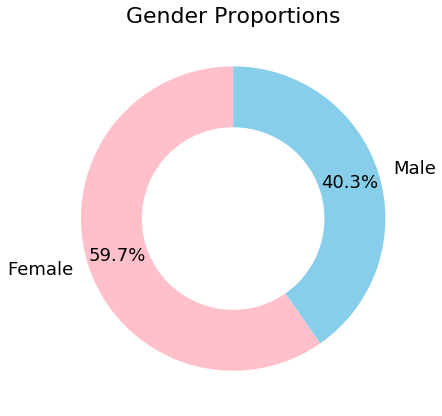

In [114]:
# Donut Chart
plt.pie(sex_counts_series, colors = ["pink", "skyblue"], labels = ["Female", "Male"], 
        autopct = '%1.1f%%', startangle = 90, pctdistance = 0.80, textprops = {"fontsize" : 18})
plt.gca().add_artist(plt.Circle((0, 0), 0.60, fc = 'white'));
plt.title("Gender Proportions")
plt.show()

Almost 60% of the customers are Female and the rest of the customers are Male.

#### 4. Homeowner

In [115]:
data["homeown_processed"].describe()

count     57622
unique        3
top         Yes
freq      41787
Name: homeown_processed, dtype: object

In [116]:
homeown_count_series = data["homeown_processed"].value_counts()
homeown_count_series

Yes        41787
No         14391
Unknown     1444
Name: homeown_processed, dtype: int64

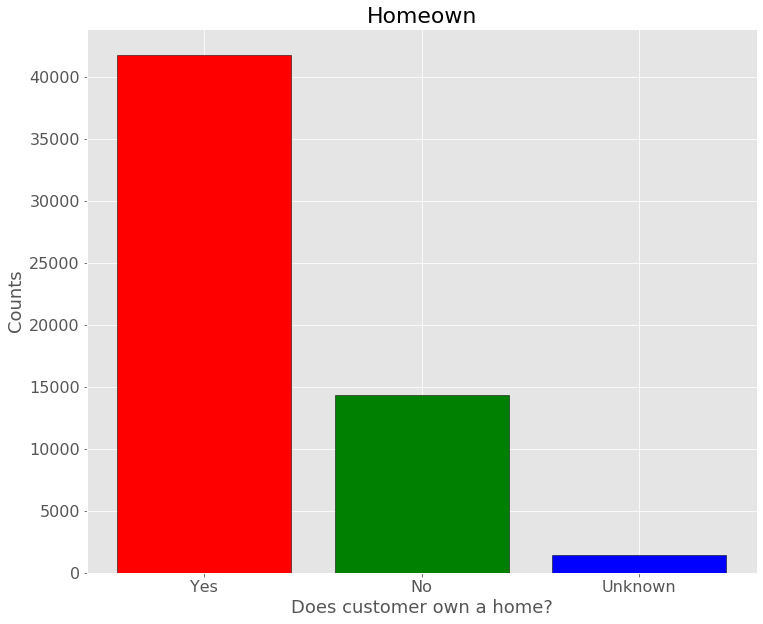

In [117]:
%autoreload 2
custom_functions.barplot(homeown_count_series, "Does customer own a home?", "Counts", "Homeown", 
                         color=["red", "green", "blue"], labels = ["Yes", "No", "Unknown"])

Most of the customers(73%) own house(s), rest of them might have been renting the house(s).

#### 5. Income

In [118]:
data["income"].describe()

count     57622.000000
mean      74884.044738
std       23761.141585
min        6000.230000
25%       65623.482975
50%       70170.424155
75%       75324.322135
max      149982.000000
Name: income, dtype: float64

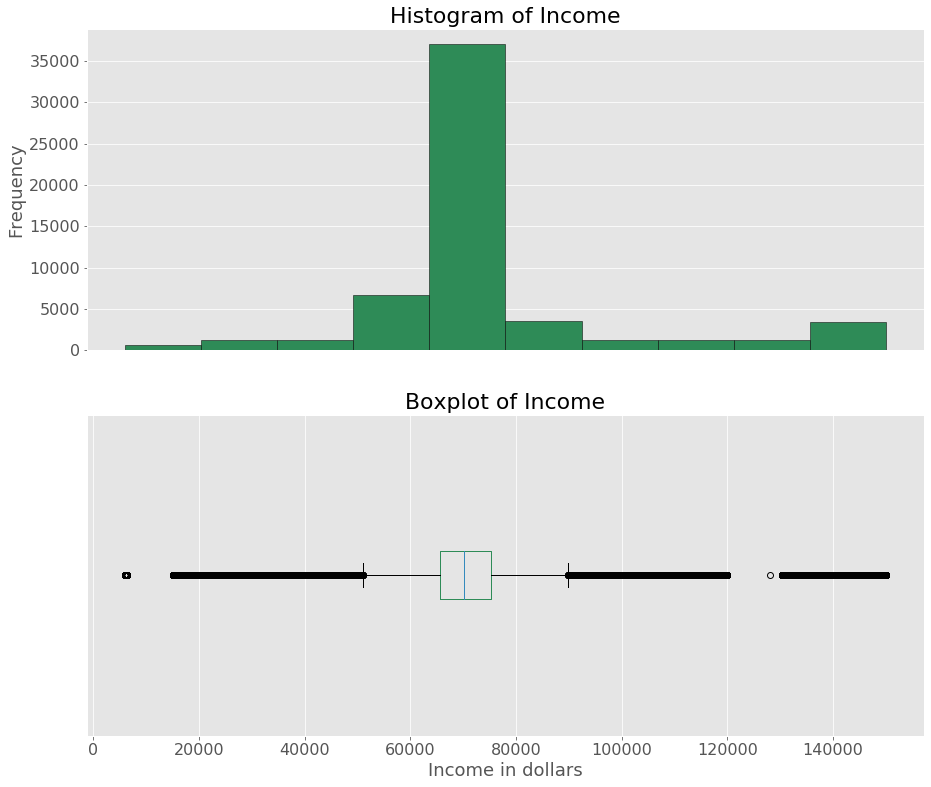

In [119]:
%autoreload 2
custom_functions.create_histogram_plus_boxplot(data["income"], "Income", color = "seagreen", ylabel = "Frequency", 
                                               xlabel = "Income in dollars" , size = (15,13))

The distribution somewhat looks normal to me. People with extreme salaries(either low or high) are less compare to median salary which is around \\$70k. We can also see that there is a break after income \\$120,000 and customers with salary higher that \\$120,000 is slightly high.

#### INTERESTING FINDING - PETS INSIGHT

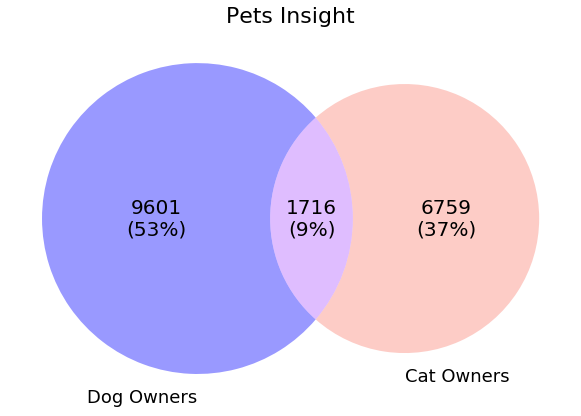

In [120]:
# Dog owners
dog_owners = data.loc[:,"dog food"].value_counts()[1]

# Cat owners
cat_owners = data.loc[:,"cat food"].value_counts()[1]

# Owns both cat and dog
flag = (data["dog food"].values == 1) & (data["cat food"].values == 1)
both_owners = flag.sum()

#### CORRECTED ####

# Dog owners
dog_owners -= both_owners

# Cat owners
cat_owners -= both_owners

# Total
total = dog_owners + cat_owners + both_owners

 
# First way to call the 2 group Venn diagram:
v2 = venn2(subsets = {'10': dog_owners,
                      '01': cat_owners,
                      '11': both_owners}, 
        set_labels = ('Dog Owners', 'Cat Owners'), set_colors = ('blue', 'salmon'), alpha = 0.4)


v2.get_label_by_id('10').set_text('%d\n(%.0f%%)' % (dog_owners, dog_owners / total * 100))
v2.get_label_by_id('01').set_text('%d\n(%.0f%%)' % (cat_owners, cat_owners / total * 100))
v2.get_label_by_id('11').set_text('%d\n(%.0f%%)' % (both_owners, both_owners / total * 100))


for text in v2.set_labels:
    text.set_fontsize(18)
    
for text in v2.subset_labels:
    text.set_fontsize(20)    

plt.title("Pets Insight")
plt.show()

31.37%(18076) of the all the customers have pet(s). Out of them 53% own only dogs, 37% only own cats and 9% own both cat(s) and dog(s).

In [158]:
# New Variable
flag_new = (data["dog food"].values == 1) | (data["cat food"].values == 1)
data["Pet Owner"] = ["Yes" if i == True else "No" for i in flag_new]
data["Pet Owner"].value_counts()

No     39546
Yes    18076
Name: Pet Owner, dtype: int64

# 4. Market Basket Analysis

Before we start MBA(Market Basket Analysis), I will explain few terms of MBA.

**RULES**

Given a rule "A -> C", A stands for antecedent(Item A) and C(Item C) stands for consequent.

**ANTECEDENT SUPPORT**

It computes the proportion of transactions that contain the antecedent A.


**CONSEQUENT SUPPORT**

It computes the support for the itemset of the consequent C.


**SUPPORT**

Support is used to measure the frequency (often interpreted as significance or importance) of an itemset in a database(all the transactions here). 

support(A -> C) = support(A ∪ C)

The 'support' metric then computes the support of the combined itemset A ∪ C -- '**'support' depends on 'antecedent support' and 'consequent support' via min('antecedent support', 'consequent support')**

\[We refer to an itemset as a "frequent itemset" if you support is larger than a specified minimum-support threshold.\]

\[Due to the downward closure property, all subsets of a frequent itemset are also frequent.\] 


**CONFIDENCE**

The confidence of a rule A -> C is the probability of seeing the consequent in a transaction given that it also contains the antecedent.

confidence(A -> C) = support(A -> C) / support(A)

**This metric is not symmetric or directed; for instance, the confidence for A -> C is different than the confidence for C -> A.**

\[The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together.\]


**LIFT**

The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A -> C occur together than we would expect if they were statistically independent.

lift(A -> C) = confidence(A -> C) / support(C)

In [121]:
# Running apriori algorithm
mba = apriori(data.loc[:, basket], min_support = 0.10, use_colnames = True, low_memory = True)

In [122]:
# Mining rules
# min threshold for lift is 1.
rules = association_rules(mba, metric = "lift", min_threshold = 1)

In [123]:
# Sorting rules based on support in descending order
rules_by_supp = rules.sort_values("support", ascending = False)

In [124]:
# Sorting rules based on support in descending order
rules_by_conf = rules.sort_values("confidence", ascending = False)

In [125]:
# Sorting rules based on support in descending order
rules_by_lift = rules.sort_values("lift", ascending = False)

## REVISITING THE RULES

### BY SUPPORT

In [126]:
rules_by_supp[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
87,(cereal),(bread),0.763545,0.828520,0.639009,0.836898,1.010112,0.006397,1.051364
86,(bread),(cereal),0.828520,0.763545,0.639009,0.771266,1.010112,0.006397,1.033754
231,(bread),(banana),0.828520,0.761862,0.638784,0.770993,1.011986,0.007566,1.039875
230,(banana),(bread),0.761862,0.828520,0.638784,0.838451,1.011986,0.007566,1.061472
88,(milk),(cereal),0.813422,0.763545,0.622176,0.764887,1.001757,0.001091,1.005705
89,(cereal),(milk),0.763545,0.813422,0.622176,0.814851,1.001757,0.001091,1.007718
257,(milk),(banana),0.813422,0.761862,0.620805,0.763201,1.001758,0.001089,1.005656
256,(banana),(milk),0.761862,0.813422,0.620805,0.814852,1.001758,0.001089,1.007723
109,(cereal),(banana),0.763545,0.761862,0.590677,0.773598,1.015405,0.008961,1.051839
108,(banana),(cereal),0.761862,0.763545,0.590677,0.775308,1.015405,0.008961,1.052349


**EXPLANATION**


Bread & Cereal is the most popular combination of products being bought 63.9% of the time. The second and third most popular combinations of product are Bread & Banana(63.8%) and Milk and Cereal(62.2%). Support for these rules is high enough, so there is no need to give discounts on these combinations of the product.

These product combinations are the most obvious as we know these products(Bread, Milk, Cereal and Banana) were purchased the most and don't have much value to us. 

As we know that these products were purchased the most, we can use that in many ways.
    
    1. Coles should put newly marketed products near the shelf of these products, So that customers are exposed to the new products.
    2. Coles should put these products to the end of the aisle, So that customers have to walk more in the stores, in turn they will be tempted to buy other products they see on their way to the most purchased product aisle.

### BY CONFIDENCE

In [127]:
rules_by_conf[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47906,"(TomatoSauce, vegetables, fruit, frozenmeal)",(banana),0.105741,0.761862,0.105342,0.996225,1.307619,0.024782,63.085918
52201,"(TomatoSauce, vegetables, fruit, coffee)",(banana),0.103294,0.761862,0.102825,0.995464,1.306620,0.024130,52.496246
87060,"(TomatoSauce, vegetables, bread, Olive Oil)",(banana),0.102582,0.761862,0.102096,0.995263,1.306356,0.023943,50.272677
100998,"(cereal, TomatoSauce, vegetables, fruit, bread)",(banana),0.116101,0.761862,0.115546,0.995217,1.306296,0.027093,49.785770
115084,"(cereal, TomatoSauce, vegetables, bread, froze...",(banana),0.106331,0.761862,0.105810,0.995104,1.306147,0.024801,48.635761
138992,"(cereal, vegetables, coffee, householCleaners,...",(banana),0.105862,0.761862,0.105272,0.994426,1.305258,0.024620,42.724797
120725,"(cereal, TomatoSauce, vegetables, coffee, bread)",(banana),0.101853,0.761862,0.101281,0.994377,1.305194,0.023683,42.352520
110190,"(TomatoSauce, vegetables, lettuce, fruit, bread)",(banana),0.107789,0.761862,0.107181,0.994365,1.305177,0.025061,42.259327
87030,"(TomatoSauce, vegetables, Chocolate, bread)",(banana),0.105012,0.761862,0.104405,0.994216,1.304982,0.024400,41.170695
110013,"(TomatoSauce, vegetables, fruit, bread, milk)",(banana),0.119902,0.761862,0.119191,0.994066,1.304785,0.027842,40.129193


**EXPLANATION**

We can see that the rules have high confidence(around 99%), the reason behind it is Banana. Because Banana was present in almost 76% of the transaction. It is appearing in all the rules with the high confidence. What we will do is we will remove the five most occuring products from the data and then we will run apriori algorithm again.

### BY LIFT

In [128]:
rules_by_lift[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37669,"(vegetables, fish)","(banana, householCleaners)",0.126115,0.330794,0.101940,0.808312,2.443551,0.060222,3.491114
37668,"(banana, householCleaners)","(vegetables, fish)",0.330794,0.126115,0.101940,0.308169,2.443551,0.060222,1.263147
37675,(householCleaners),"(banana, vegetables, fish)",0.382337,0.110739,0.101940,0.266624,2.407683,0.059601,1.212559
37662,"(banana, vegetables, fish)",(householCleaners),0.110739,0.382337,0.101940,0.920545,2.407683,0.059601,7.773787
93085,"(banana, Napies, bread)","(vegetables, Baby Food)",0.164382,0.283277,0.109108,0.663746,2.343096,0.062542,2.131491
93096,"(vegetables, Baby Food)","(banana, Napies, bread)",0.283277,0.164382,0.109108,0.385162,2.343096,0.062542,1.359087
93089,"(vegetables, Baby Food, bread)","(banana, Napies)",0.242078,0.198310,0.109108,0.450713,2.272775,0.061101,1.459512
93092,"(banana, Napies)","(vegetables, Baby Food, bread)",0.198310,0.242078,0.109108,0.550188,2.272775,0.061101,1.684976
95999,"(banana, Napies, milk)","(vegetables, Baby Food)",0.161622,0.283277,0.103138,0.638140,2.252706,0.057354,1.980664
96010,"(vegetables, Baby Food)","(banana, Napies, milk)",0.283277,0.161622,0.103138,0.364087,2.252706,0.057354,1.318385


**EXPLANATION**

Same problem as I mentioned above we can see Banana in all the rules.

### RE-RUNNING THE APRIORI ALGORITHM

In [129]:
basket_new = ['fruit', 'freshmeat', 'dairy','MozerallaCheese', 'cannedveg', 'frozenmeal', 'frozendessert', 
              'PizzaBase', 'TomatoSauce', 'frozen fish', 'softdrink', 'fruitjuice', 'confectionery', 
              'fish', 'vegetables', 'icecream', 'energydrink', 'tea', 'coffee', 'laundryPowder', 'householCleaners', 
              'corn chips', 'Frozen yogurt', 'Chocolate', 'Olive Oil', 'Baby Food', 'Napies', 'cat food', 
              'dog food', 'mince', 'sunflower Oil', 'chicken', 'vitamins', 'deodorants', 'dishwashingliquid', 'onions', 
              'KitKat', 'TeaTowel', 'Scones']

# Running apriori algorithm
mba_new = apriori(data.loc[:, basket_new], min_support = 0.10, use_colnames = True, low_memory = True)

# Mining rules
# min threshold for lift is 1.
rules_new = association_rules(mba_new, metric = "lift", min_threshold = 1)

# Sorting rules based on support in descending order
rules_by_supp_new = rules_new.sort_values("support", ascending = False)

# Sorting rules based on support in descending order
rules_by_conf_new = rules_new.sort_values("confidence", ascending = False)

# Sorting rules based on support in descending order
rules_by_lift_new = rules_new.sort_values("lift", ascending = False)

### RULES BY CONFIDENCE

In [130]:
rules_by_conf_new[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1564,"(TomatoSauce, Napies)",(Baby Food),0.107823,0.484433,0.103311,0.958152,1.977884,0.051078,12.320068
2127,"(Napies, Olive Oil)",(Baby Food),0.113793,0.484433,0.107233,0.942352,1.945267,0.052108,8.943314
2781,"(coffee, frozenmeal, householCleaners)",(vegetables),0.146264,0.585020,0.137465,0.939843,1.606516,0.051898,6.898333
2888,"(TomatoSauce, coffee, householCleaners)",(vegetables),0.112631,0.585020,0.105359,0.935439,1.598988,0.039468,6.427739
2108,"(Napies, Chocolate)",(Baby Food),0.115043,0.484433,0.106921,0.929401,1.918534,0.051190,7.302764
2945,"(coffee, Olive Oil, householCleaners)",(vegetables),0.117993,0.585020,0.109594,0.928813,1.587661,0.040565,5.829446
762,"(Napies, fruit)",(Baby Food),0.160859,0.484433,0.149353,0.928471,1.916614,0.071427,7.207828
2495,"(fruit, coffee, householCleaners)",(vegetables),0.167141,0.585020,0.154906,0.926799,1.584218,0.057125,5.669044
2931,"(Chocolate, coffee, householCleaners)",(vegetables),0.117785,0.585020,0.108847,0.924120,1.579639,0.039941,5.468877
2903,"(corn chips, coffee, householCleaners)",(vegetables),0.120405,0.585020,0.111242,0.923897,1.579259,0.040803,5.452905


**EXPLANATION**

The probabilities that Customers will buy Baby Food are 95.8% and 94.2% when they buy (Napies & TomatoSauce) and (Napies and Olive Oil). Similarly, probabilities that customers will buy Vegetables are 93.9% and 93.5% when they buy (householCleaners, frozenmeal & coffee) and (householCleaners, TomatoSauce & coffee). However, these combinations of products are less likely to occur(10% - 14%).

RULES 1565 and 2127 are rather strong - they both have high lift and confidence indicating that customers who buy antecedent products are 1.9 times more likely to buy the consequent products. RULES 2780 and 2887 are less obvious relationships. Although, the lift for these rules is low, coles could probably increase sales by advertising/marketing householCleaners, coffee, frozenmeal, TomatoSauce with Vegetables(if possible stock them near).  

**Obvious rules**

(Chocolate, Napies) -> (Baby Food).

(Napies, fruit) -> (Baby Food).
    
==> Parents often buy fruit and chocolates for their young ones.

(Napies, TomatoSauce) -> (Baby Food).

(Napies, Olive Oil) -> (Baby Food).

==> By looking at the rules with Baby Food in consequent(with low support), We can give discounts on Baby Food if customers by (Napies & fruit), (Napies, Chocolate), (Napies, Olive Oil) or (Napies & TomatoSauce) to increase the support of these transactions\[If it is not possible to carry out marketing for all the combinations, what we can do is we can give discounts on Baby Food if customer buys Napies.\].  

### RULES BY LIFT

In [131]:
rules_by_lift_new[:15]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1591,(householCleaners),"(vegetables, fish)",0.382337,0.126115,0.108170,0.282920,2.243345,0.059952,1.218671
1586,"(vegetables, fish)",(householCleaners),0.126115,0.382337,0.108170,0.857713,2.243345,0.059952,4.340967
510,"(fruit, fish)",(householCleaners),0.130592,0.382337,0.103242,0.790565,2.067719,0.053312,2.949186
515,(householCleaners),"(fruit, fish)",0.382337,0.130592,0.103242,0.270029,2.067719,0.053312,1.191016
511,"(fruit, householCleaners)",(fish),0.241679,0.213738,0.103242,0.427187,1.998648,0.051586,1.372632
514,(fish),"(fruit, householCleaners)",0.213738,0.241679,0.103242,0.483030,1.998648,0.051586,1.466858
1569,(Baby Food),"(TomatoSauce, Napies)",0.484433,0.107823,0.103311,0.213262,1.977884,0.051078,1.134020
1564,"(TomatoSauce, Napies)",(Baby Food),0.107823,0.484433,0.103311,0.958152,1.977884,0.051078,12.320068
2893,"(vegetables, coffee)","(TomatoSauce, householCleaners)",0.331627,0.160876,0.105359,0.317704,1.974835,0.052008,1.229853
2892,"(TomatoSauce, householCleaners)","(vegetables, coffee)",0.160876,0.331627,0.105359,0.654908,1.974835,0.052008,1.936799


#### EXPLANATION

RULE 1588 - As we can see, Customers who bought Vegetables & Fish are 2.2 times more likely to buy householCleaner. These items were bought together for like 10% of the time but 85% of the customers who bought Vgetables & Fish also bought householCleaners. These three products need to be marketed together or perhaps give discount on householCleaner to the customer who buys Vegetable & Fish. 

    1. Coles should spatially seperate fish and householCleaner for greater travel distance so that customer will be encouraged to purchase other products.

# 5. Clustering

## 1. K-means Clustering

### How Kmeans works?


I. **Initialization** - First step is to randomly assign centroid for the clusters. This is typically done by randomly choosing K(here 4) points from the input set(we have created 4 centroids it using standard deviation and mean of the data in the above cell).

II. **Cluster Assignment** - Here each observation(each data point) is assigned to cluster centroid such that is minimum or is maximum. Various metrics can be used to calculate similarities/dissimilarities between data points. This generally means assigning the data point to the closest centroid point. Here I have used Euclidean distance, which goes like following.

$$ d(P, C) =  \sqrt{(x_{1} - X)^2 + (y_{1} - Y)^2} $$where $(x_{1}, y_{1})$ is an observation point($P$) and $(X, Y)$ is a centroid point($C$).

III. **Centroid Update** - After all the points or observations are assigned to the centroids, each centroid is computed again. Here we are using Kmeans that's why new centroids will be computed by averaging(taking mean) the observation or data points which were assigned to the centroids in the II step. [You can see that centroid are being pulled by data points]

IV. **Convergence** - Step II and III are repeated until the algorithm converges or some criterion is reached. There are several ways to detect convergence. The most typical way is to run until none of the observations change cluster membership(used here).

**Extras** - Kmeans often gives local minima(not the best solution/not the optimal solution). To overcome this, Kmeans is run for several times each time taking a different set of initial random centroids.


#### Before KMeans

I am going to standardize the variables, because three continuous variables we have here are not on the same scale(not on equal footing). Because income has larger values, it is going to dominate the cluster results and clusters are gonna form based on different values of income. Find the plot in below cell.

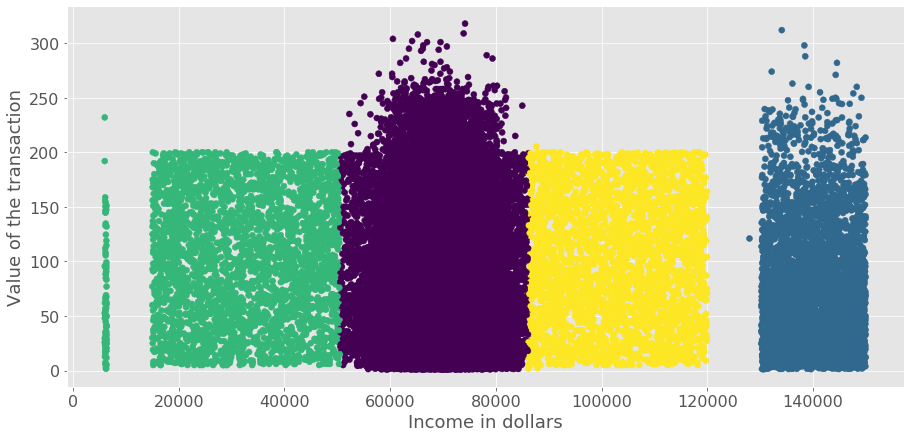

In [132]:
# TESTING
test = KMeans(n_clusters = 4)
test_fit = test.fit(data.loc[:,["income", "age", "Value"]])

# Plotting the scatter plot
plt.scatter(data["income"], data["Value"], c = test_fit.labels_)
plt.xlabel("Income in dollars")
plt.ylabel("Value of the transaction")
plt.show()

As we can see there are 4 visible groups in the income, because income has larger values compare to other variables.

#### Standardizing the variables

In [133]:
# Creating new variable -  Z-score of the variables
data["z_income"] = (data["income"] - data["income"].mean())/data["income"].std()
data["z_value"] = (data["Value"] - data["Value"].mean())/data["Value"].std()
data["z_age"] = (data["age"] - data["age"].mean())/data["age"].std()

#### Number of Clusters

In [134]:
# Sum of squares
sum_of_square = []
for i in range(1,10):
    cluster = KMeans(n_clusters = i)
    cluster.fit(data.loc[:, ["z_age", "z_income", "z_value"]])
    sum_of_square.append(cluster.inertia_)

The **within-cluster sum of squares** OR **intertia** is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. Clusters that have higher values exhibit greater variability of the observations within the cluster

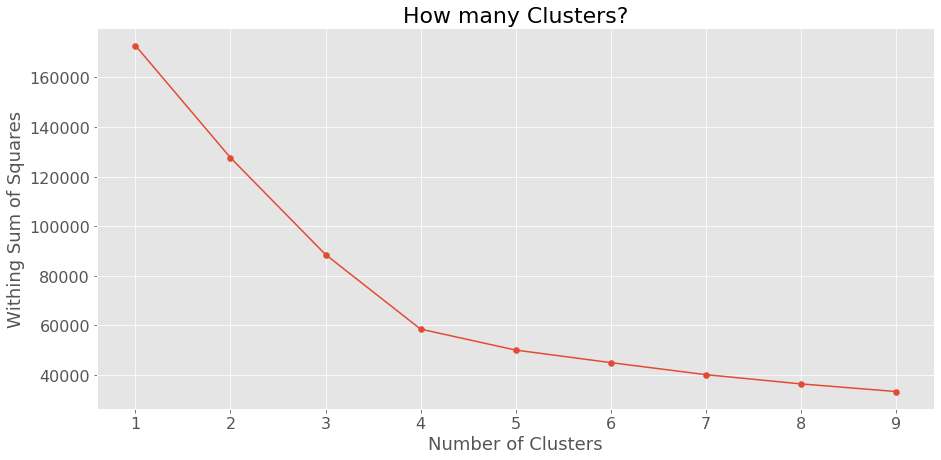

In [135]:
# Deciding how many clusters we should create
plt.scatter(range(1,10), sum_of_square)
plt.plot(range(1,10), sum_of_square)
plt.xlabel("Number of Clusters")
plt.ylabel("Withing Sum of Squares")
plt.title("How many Clusters?")
plt.show()

As we can see that there is a clear elbow forming at 4(Optimal **within sum of square** OR **intertia**), We are going to choose 4 clusters for this data. We can see that, higher number of clusters have less withing sum of square but it would be hard to interpret that many clusters.

#### Clustering with 4 Cluster

In [159]:
# KMeans performing
cluster = KMeans(n_clusters = 4, random_state = 73)
cluster.fit(data.loc[:, ["z_age", "z_income", "z_value"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=73, tol=0.0001, verbose=0)

In [160]:
# Storing the cluster value
data["cluster"] = cluster.labels_

### Cluster Analysis

In [161]:
# 4 clusters
data.groupby("cluster").mean().loc[:,["Value", "income", "age"]]

,Value,income,age
cluster,,,
0,103.329942,66729.276446,72.172160
1,141.883790,68186.366024,36.423743
2,40.727241,68771.809001,37.495484
3,73.862760,136185.948036,37.460259


### Size of the Clusters

In [162]:
# Creating dataframes for individual cluster
cluster1 = data.loc[data["cluster"] == 0, :]
cluster2 = data.loc[data["cluster"] == 1, :]
cluster3 = data.loc[data["cluster"] == 2, :]
cluster4 = data.loc[data["cluster"] == 3, :]

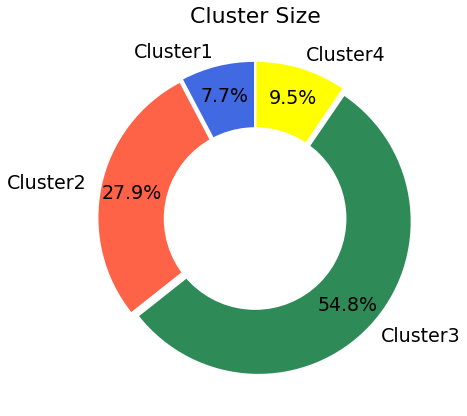

In [163]:
# Getting size of clusters
size_c1 = cluster1.shape[0]
size_c2 = cluster2.shape[0]
size_c3 = cluster3.shape[0]
size_c4 = cluster4.shape[0]

sizes = [size_c1, size_c2, size_c3, size_c4]

## Percentage of clusters
plt.pie(sizes, colors = ["royalblue", "tomato", "seagreen", "yellow"], 
        labels = ["Cluster1", "Cluster2", "Cluster3", "Cluster4"], autopct = '%1.1f%%', startangle = 90, 
        pctdistance = 0.80, textprops = {"fontsize" : 19}, explode = (0.03,) * 4)
plt.gca().add_artist(plt.Circle((0, 0), 0.60, fc = 'white'))
plt.title("Cluster Size")
plt.show()

### Income in various Cluster

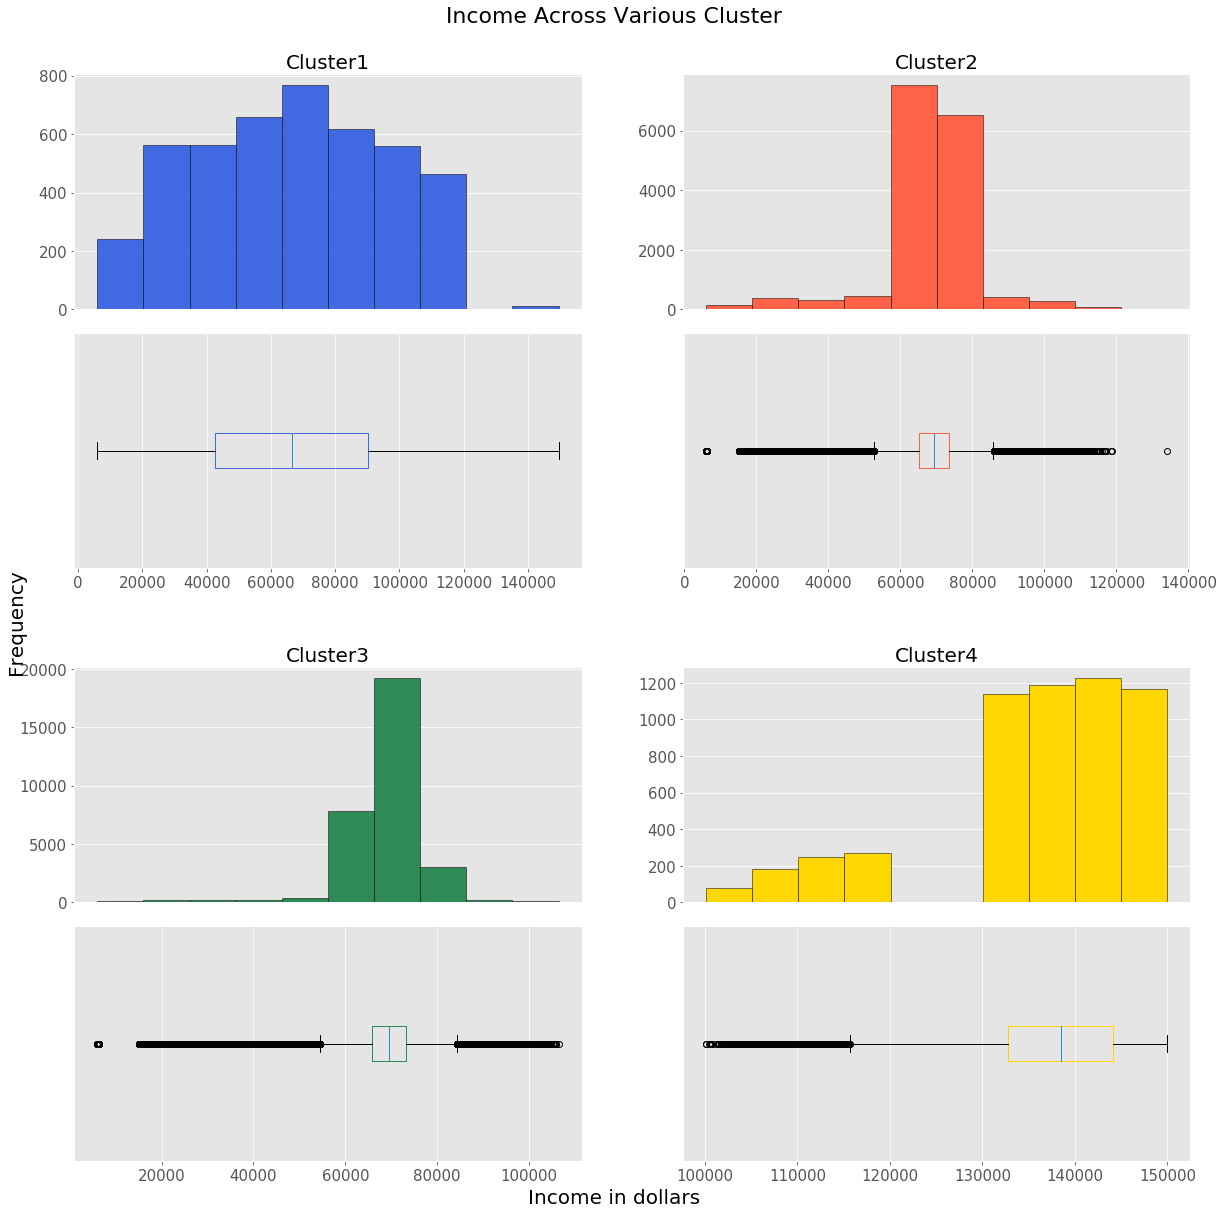

In [164]:
%autoreload 2

# Creating list of list of income for 4 clusters
income_cluster = [cluster1["income"].values, cluster2["income"].values, cluster3["income"].values, cluster4["income"].values]

# Plotting the histogram and boxplot for income 
custom_functions.create_cluster_histo_and_box(var_name = "Income", values = income_cluster, xlab = "Income in dollars")

### Value in various Cluster

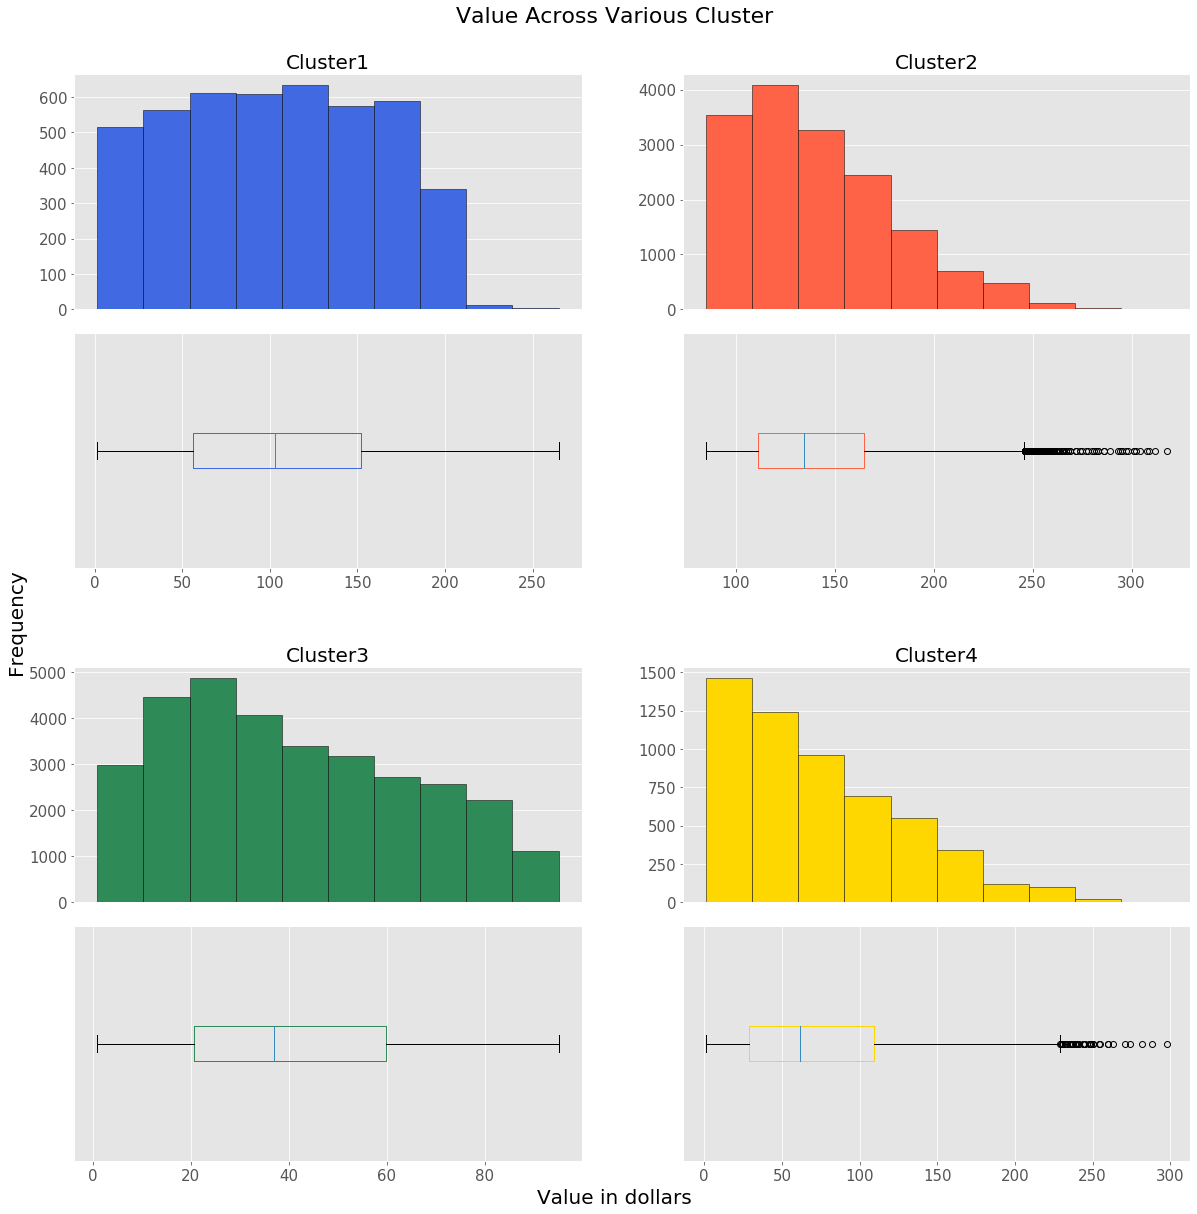

In [165]:
%autoreload 2

# Creating list of list of income for 4 clusters
value_cluster = [cluster1["Value"].values, cluster2["Value"].values, cluster3["Value"].values, cluster4["Value"].values]

# Plotting the histogram and boxplot for income 
custom_functions.create_cluster_histo_and_box(var_name = "Value", values = value_cluster, xlab = "Value in dollars")

### Age in various Cluster

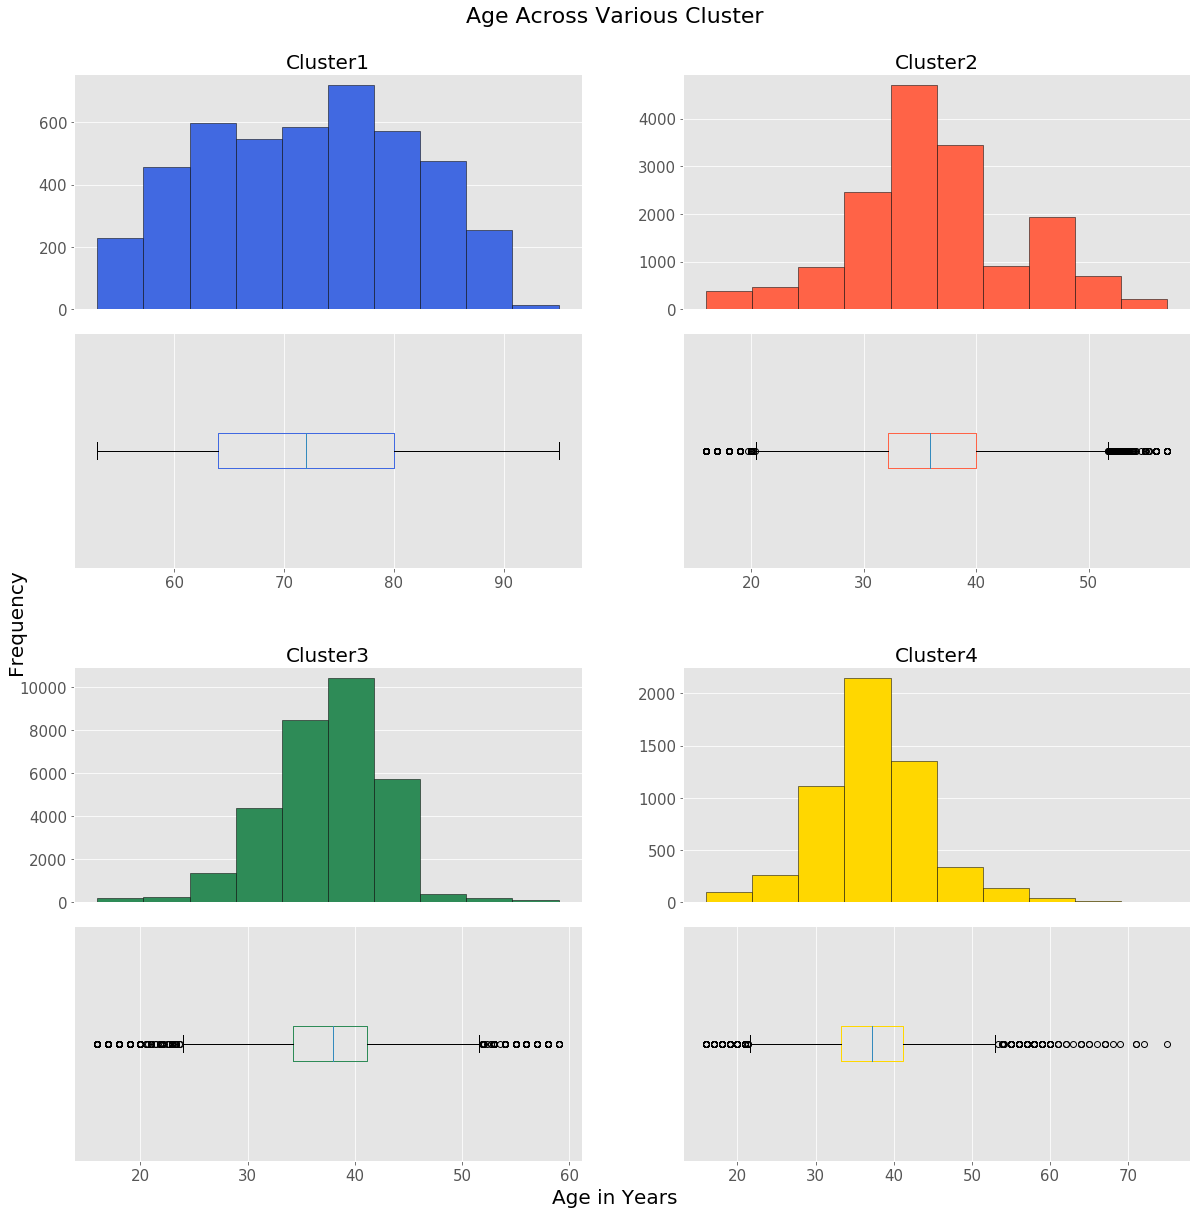

In [166]:
%autoreload 2

# Creating list of list of income for 4 clusters
age_cluster = [cluster1["age"].values, cluster2["age"].values, cluster3["age"].values, cluster4["age"].values]

# Plotting the histogram and boxplot for income 
custom_functions.create_cluster_histo_and_box(var_name = "Age", values = age_cluster, xlab = "Age in Years")

### No of Children in various Cluster

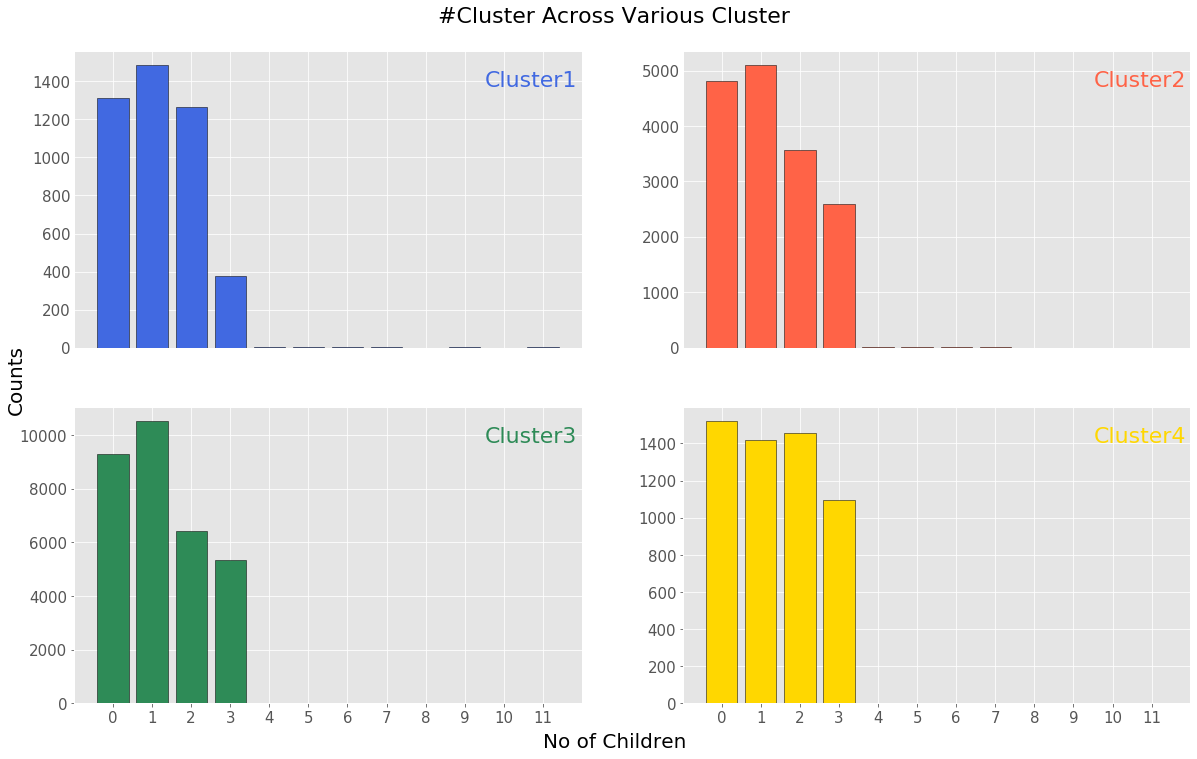

In [167]:
%autoreload 2
nchildren_cluster = [cluster1["nchildren_processed"].value_counts(), cluster2["nchildren_processed"].value_counts(), 
                     cluster3["nchildren_processed"].value_counts(), cluster4["nchildren_processed"].value_counts()]

custom_functions.create_cluster_bar("#Cluster", values = nchildren_cluster, max_possible_val = int(data["nchildren"].max()), 
                   xlab = "No of Children")

### Distribution of Gender in Cluster

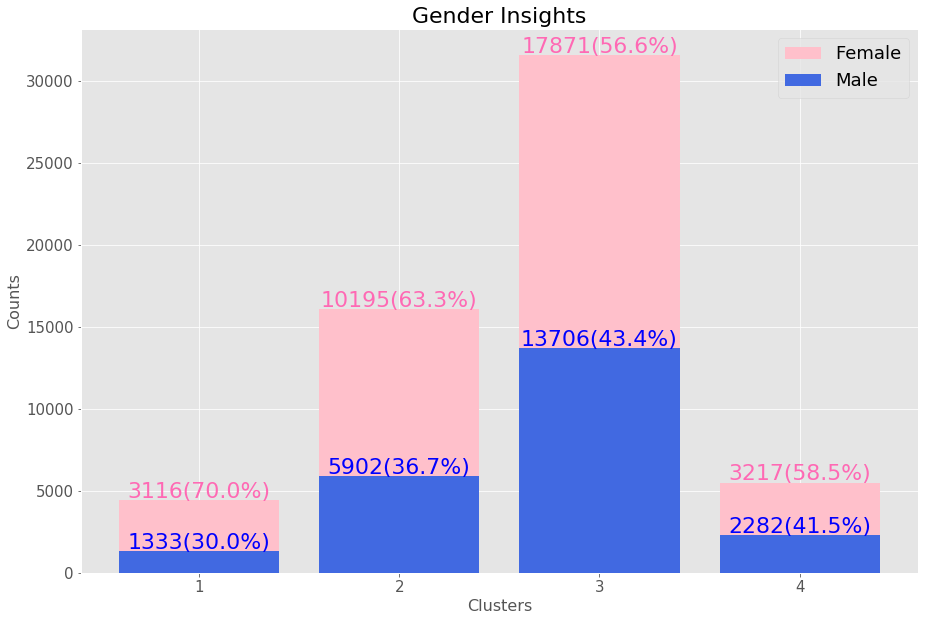

In [168]:
%autoreload 2
sex_clusters = [cluster1["sex_processed"].value_counts()["Male"], cluster2["sex_processed"].value_counts()["Male"],
     cluster3["sex_processed"].value_counts()["Male"], cluster4["sex_processed"].value_counts()["Male"]]

custom_functions.create_cluster_stacked_bar(var_name = "Gender", sizes = sizes, values = sex_clusters)

### Payment methods used 

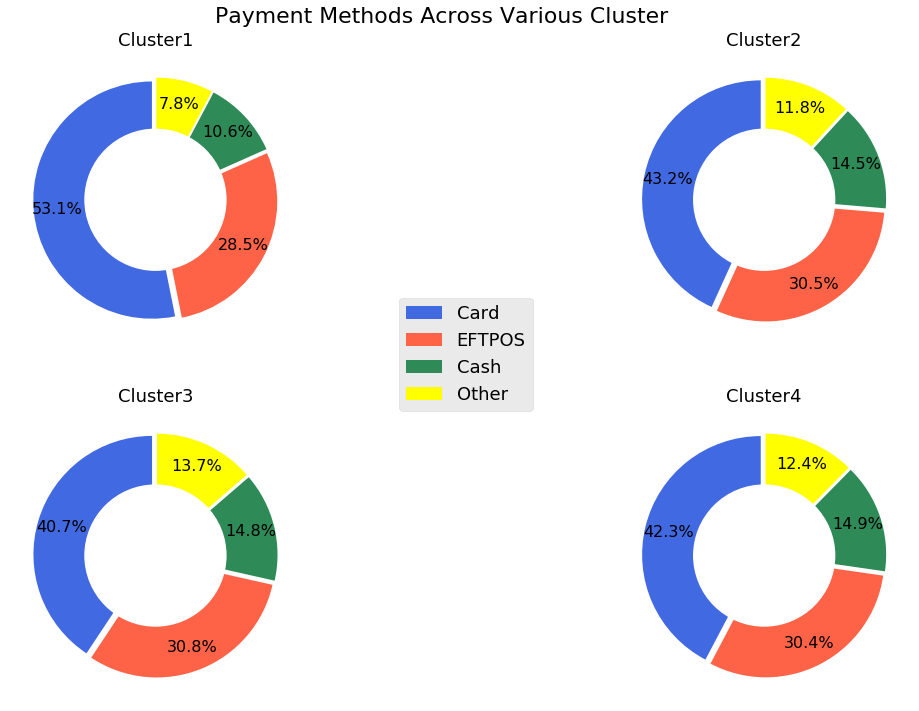

In [169]:
%autoreload 2
pmethod_cluster = [cluster1["pmethod_processed"].value_counts(), cluster2["pmethod_processed"].value_counts(),
                  cluster3["pmethod_processed"].value_counts(), cluster4["pmethod_processed"].value_counts()]

custom_functions.create_cluster_donut_chart("Payment Methods", values = pmethod_cluster)

In [170]:
cluster2["parent"].value_counts()

Yes    11285
No      4812
Name: parent, dtype: int64

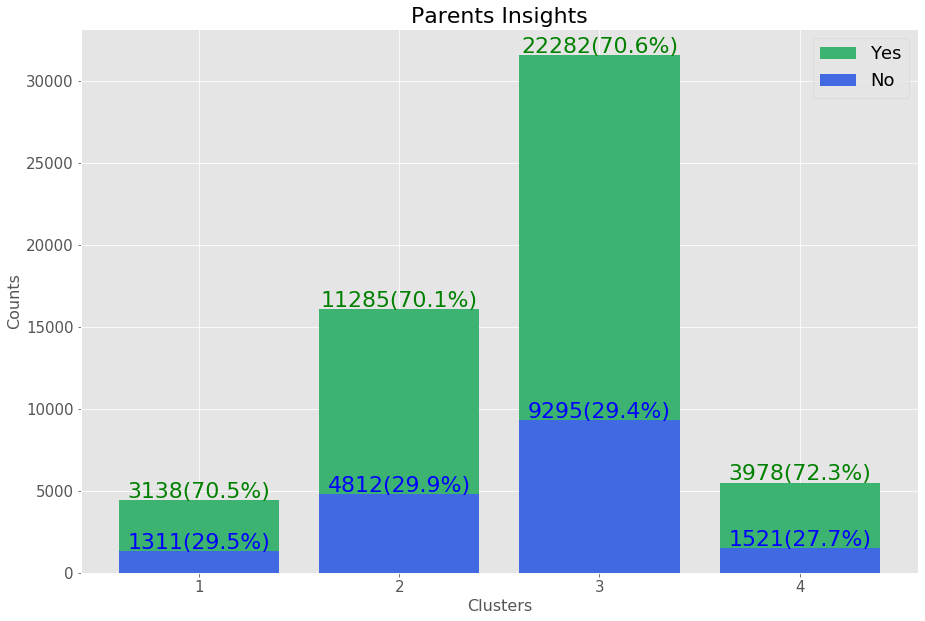

In [171]:
%autoreload 2
parent_clusters = [cluster1["parent"].value_counts()["No"], cluster2["parent"].value_counts()["No"],
     cluster3["parent"].value_counts()["No"], cluster4["parent"].value_counts()["No"]]

custom_functions.create_cluster_stacked_bar(var_name = "Parents", sizes = sizes, values = parent_clusters, 
                                            labels = ["Yes", "No"], colors_bar = ["royalblue", "mediumseagreen"],
                                           colors_text = ["blue", "green"])

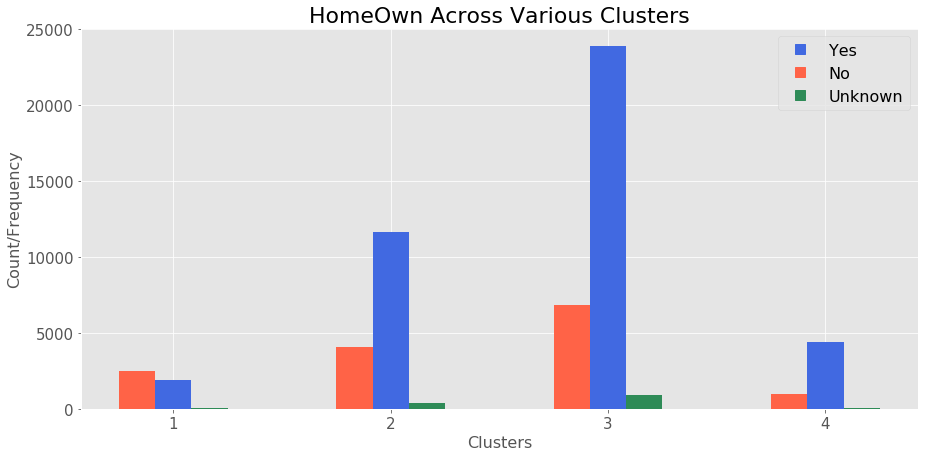

In [172]:
%autoreload 2

homeown_cluster = [ cluster1["homeown_processed"].value_counts(), 
    cluster2["homeown_processed"].value_counts(),
    cluster3["homeown_processed"].value_counts(),
    cluster4["homeown_processed"].value_counts()]


custom_functions.create_cluster_bar_side("HomeOwn", values = homeown_cluster)

Most of the Customers in Clusters 1,2 & 3 own a house but in Cluster 4 Most of the customers do not own a house.

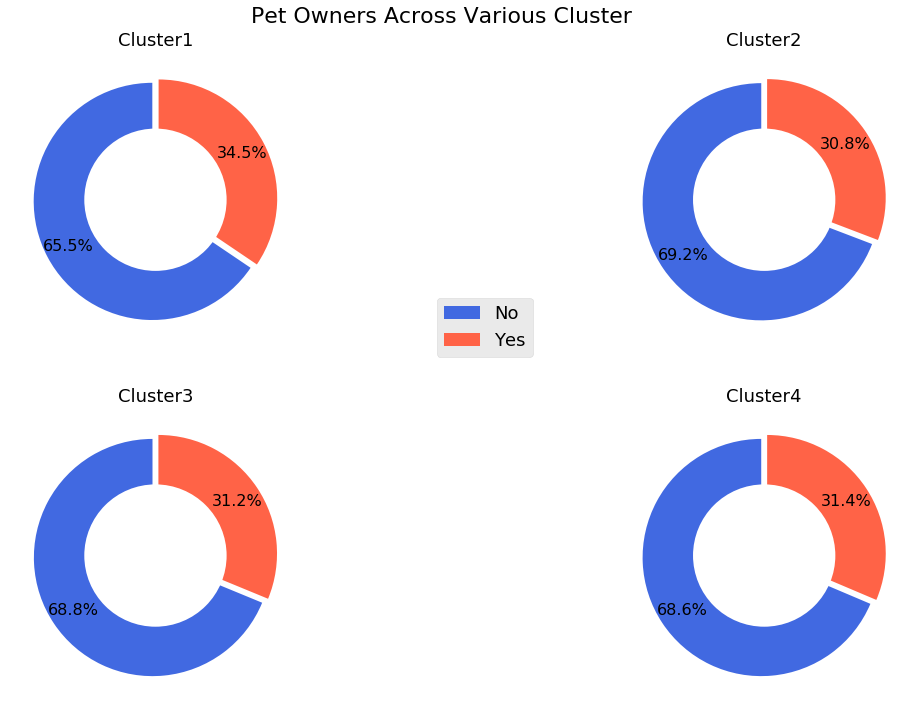

In [176]:
%autoreload 2

pet_owners_cluster = [cluster1["Pet Owner"].value_counts(), cluster2["Pet Owner"].value_counts(),
                  cluster3["Pet Owner"].value_counts(), cluster4["Pet Owner"].value_counts()]

custom_functions.create_cluster_donut_chart("Pet Owners", values = pet_owners_cluster, labels = ["No", "Yes"], ncluster = 4, 
         color = ["royalblue", "tomato"], figsize = (20, 12))

Similar % of the Pet Ownership can be seen across all the clusters in the above chart.

In [ ]:
%autoreload 2

ncluster = 4

# Dog owners
dog_owners = [
              cluster1["dog food"].value_counts()[1], cluster2["dog food"].value_counts()[1],
              cluster3["dog food"].value_counts()[1], cluster4["dog food"].value_counts()[1]
             ]


# Cat owners
cat_owners = [
              cluster1["cat food"].value_counts()[1], cluster2["cat food"].value_counts()[1],
              cluster3["cat food"].value_counts()[1], cluster4["cat food"].value_counts()[1]
             ]

# Owns both cat and dog
flag1 = (cluster1["dog food"].values == 1) & (cluster1["cat food"].values == 1)
flag2 = (cluster2["dog food"].values == 1) & (cluster2["cat food"].values == 1)
flag3 = (cluster3["dog food"].values == 1) & (cluster3["cat food"].values == 1)
flag4 = (cluster4["dog food"].values == 1) & (cluster4["cat food"].values == 1)
both_owners = [flag1.sum(), flag2.sum(), flag3.sum(), flag4.sum()]

#### CORRECTED ####
total = []

for i in range(ncluster):
    # Dog owners
    dog_owners[i] -= both_owners[i]

    # Cat owners
    cat_owners[i] -= both_owners[i]

    # Total
    total.append(dog_owners[i] + cat_owners[i] + both_owners[i])


custom_functions.create_cluster_venn_diagrams(dog_owners, cat_owners, both_owners, total, sizes)

% of customers who own both cat and dog is almost the same(~10%) across the clusters.

### Cluster Explanation

   I.   **Cluster 1** - **Young & Broke**. Customers in cluster 1 are young having mean age of 37 years and have low income.  
   
   II.  **Cluster 2** -
   
   III. **Cluster 3** -
   
   IV.  **Cluster 4** -

Index(['ReceiptID', 'Value', 'pmethod', 'sex', 'homeown', 'income', 'age',
       'PostCode', 'nchildren', 'fruit', 'freshmeat', 'dairy',
       'MozerallaCheese', 'cannedveg', 'cereal', 'frozenmeal', 'frozendessert',
       'PizzaBase', 'TomatoSauce', 'frozen fish', 'bread', 'milk', 'softdrink',
       'fruitjuice', 'confectionery', 'fish', 'vegetables', 'icecream',
       'energydrink', 'tea', 'coffee', 'laundryPowder', 'householCleaners',
       'corn chips', 'Frozen yogurt', 'Chocolate', 'Olive Oil', 'Baby Food',
       'Napies', 'banana', 'cat food', 'dog food', 'mince', 'sunflower Oil',
       'chicken', 'vitamins', 'deodorants', 'dishwashingliquid', 'onions',
       'lettuce', 'KitKat', 'TeaTowel', 'Scones', 'pmethod_processed',
       'sex_processed', 'homeown_processed', 'nchildren_processed', 'parent',
       'z_income', 'z_value', 'z_age', 'cluster', 'Pet Owner'],
      dtype='object')